## A PROJECT IN DATA ANALYSIS - ANALYZING FUNDING TRENDS IN INDIAN START-UPS

#### PROJECT SCENARIO
Your team is trying to venture into the Indian start-up ecosystem. As the data expert of the team, you are to investigate the ecosystem and propose the best course of action.
 * Analyze funding received by start-ups in India from 2018 to 2021.
 * Separate data for each year of funding will be provided.
 * In these datasets, you'll find the start-ups' details, the funding amounts received, and the investors' information.

#### PROJECT DESCRIPTION
This project employs the CRISP-DM model to analyze funding trends in the dynamic Indian start-up ecosystem. By leveraging publicly available data sources such as start-up databases, the aim is to uncover valuable insights for stakeholders, including investors, entrepreneurs, policymakers, and researchers. The project begins with a comprehensive understanding of the business context, recognizing the importance of start-up funding dynamics for various stakeholders. We then delve into the data understanding phase, gathering and preparing relevant datasets encompassing funding amounts, start-up names, industry sectors, and geographical locations. 
Data preprocessing techniques are applied to clean, integrate, and transform the raw data into a suitable format for analysis. This involves handling missing values, standardizing data formats, and performing feature engineering to extract pertinent features. Selected analytical questios will be answered using visualizations and hypothesis testing will be conducted to validate assumptions and test relationships between variables.
Finally, the findings and insights will be documented in the form of an article and an interactive dashboard deployed in Power BI to facilitate exploration and dissemination of the results to a wider audience.
By following the CRISP-DM model and incorporating hypothesis testing, this project aims to provide actionable insights into Indian start-up funding trends. It empowers stakeholders to make informed decisions, capitalize on opportunities, and contribute to the growth and sustainability of the start-up ecosystem in India. 


#### BUSINESS UNDERSTANDING

Understanding the dynamics of start-up funding in India is crucial for investors seeking lucrative opportunities, entrepreneurs planning to launch new ventures, policymakers aiming to foster innovation, and researchers studying the evolving landscape. By analyzing funding trends, we aim to identify patterns, drivers, and key factors influencing investment decisions.

#### HYPOTHESIS
Null Hypothesis: The Sector a start-up belongs to has no significant impact on the funding amount it receives.

Alternate Hypothesis: The Sector a start-up belongs to has a significant impact on the funding amount it receives.

#### ANALYTICAL QUESTIONS
* What is the total funding amount received by start-ups each year?
* Which ten start-ups received the most funding?
* Which ten start-ups received the least funding?
* Which ten sectors received the most funding?
* Which ten sectors received the least funding?
* How many start-ups got funded each year?

#### DATA UNDERSTANDING

##### Loading the necessary python libraries

In [1]:
import numpy as np
import pandas as pd
import os
import pyodbc
from dotenv import load_dotenv
from dotenv import dotenv_values
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

##### Load the datasets



##### This dataframe helps me to access the original dataset anytime i need to.

In [2]:
#Loading the 2018 dataset
df_2018N = pd.read_csv('./Dataset/startup_funding2018.csv') 

#Loading the 2019 dataset
df_2019N = pd.read_csv('./Dataset/startup_funding2019.csv') 

#Loading 2020 and 2021 datasets
# Load environment variables from .env file
environment_variables = dotenv_values('.env')

# Access database credentials from environment variables dictionary
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
password = environment_variables.get("PASSWORD")
username = environment_variables.get("USERNAME")

# Construct the connection string
connection_string = f"DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};User Id={username};PASSWORD={password};"

print("USERNAME:", username)

# Construct the connection string
connection_string = f"DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};"
# Connect to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful!")
except Exception as e:
    print("Error:", e)

# Specify the SQL queries to extract data from the tables
query_2020N = "SELECT * FROM dbo.LP1_startup_funding2020"
query_2021N = "SELECT * FROM dbo.LP1_startup_funding2021"

# Suppress warnings
warnings.filterwarnings('ignore')

# Create a cursor from the connection
with connection.cursor() as cursor:
    # Execute the queries and fetch data into Pandas DataFrames
    df_2020N = pd.read_sql_query(query_2020N, connection)
    df_2021N = pd.read_sql_query(query_2021N, connection)


USERNAME: LP1_learner
Connection successful!


##### This is the main dataframe used in the analysis

In [3]:
#Loading the 2018 dataset
df_2018 = pd.read_csv('./Dataset/startup_funding2018.csv') 

#Loading the 2019 dataset
df_2019 = pd.read_csv('./Dataset/startup_funding2019.csv') 

#Loading 2020 and 2021 datasets
# Load environment variables from .env file
environment_variables = dotenv_values('.env')

# Access database credentials from environment variables dictionary
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
password = environment_variables.get("PASSWORD")
username = environment_variables.get("USERNAME")

# Construct the connection string
connection_string = f"DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};User Id={username};PASSWORD={password};"

print("USERNAME:", username)

# Construct the connection string
connection_string = f"DRIVER=ODBC Driver 17 for SQL Server;SERVER={server};DATABASE={database};UID={username};PWD={password};"
# Connect to the database
try:
    connection = pyodbc.connect(connection_string)
    print("Connection successful!")
except Exception as e:
    print("Error:", e)

# Specify the SQL queries to extract data from the tables
query_2020 = "SELECT * FROM dbo.LP1_startup_funding2020"
query_2021 = "SELECT * FROM dbo.LP1_startup_funding2021"

# Suppress warnings
warnings.filterwarnings('ignore')

# Create a cursor from the connection
with connection.cursor() as cursor:
    # Execute the queries and fetch data into Pandas DataFrames
    df_2020 = pd.read_sql_query(query_2020, connection)
    df_2021 = pd.read_sql_query(query_2021, connection)

USERNAME: LP1_learner
Connection successful!


##### YEAR 2018

In [4]:
#Preview of the dataset
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [5]:
#The number of rows and columns
df_2018.shape

(526, 6)

In [6]:
#Check the cell values
df_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


##### Observations
1. This dataset does not have the columns; 'Founded', 'Founders' and 'Investor'.
2. The column 'Location' is the same as the column 'HeadQuarter' in the other datasets.
3. The column 'Industry' is the same as the column 'Sector' in the other datasets.
4. The dataset has no null values.
5. The 'Stage' and 'What it does' columns wil be dropped since they are insignificant to our hypothesis and analytical questions

##### YEAR 2019

In [7]:
#Preview of the dataset
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [8]:
#The number of rows and columns
df_2019.shape

(89, 9)

In [9]:
#Check the cell values
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


##### Observations
Some columns have null values. These columns will be examined during the data cleaning stage.

##### YEAR 2020

In [10]:
#Preview of the dataset
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [11]:
#The number of rows and columns
df_2020.shape

(1055, 10)

In [12]:
#Check the cell values
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


##### Observations
Some columns have null values. These columns will be examined during the data cleaning stage.

##### YEAR 2021

In [13]:
#Preview of the dataset
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [14]:
#The number of rows and columns
df_2021.shape

(1209, 9)

In [15]:
#Check the cell values
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


##### Observations
Some columns have null values. These columns will be examined during the data cleaning stage.

#### DATA CLEANING

##### Cleaning the 2018 Dataset

In [16]:
#Preview of the dataset
df_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [17]:
#Change the column names to match the columns of the other datasets.

column_dict = {
    'Company Name': 'Company/Brand',
    'Industry': 'Sector',
    'Round/Series': 'Stage',
    'Location': 'HeadQuarter',
    'About Company': 'What it does',
    'Amount': 'Amount($)'
}

df_2018 = df_2018.rename(columns=column_dict)
df_2018.head()

,Company/Brand,Sector,Stage,Amount($),HeadQuarter,What it does
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [18]:
#Drop the "Stage" and "What it does" columns since they are insignificant to our hypothesis and analytical questions
df_2018 = df_2018.drop(["Stage", "What it does"], axis=1)
df_2018.head()

,Company/Brand,Sector,Amount($),HeadQuarter
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",250000,"Bangalore, Karnataka, India"
1,Happy Cow Dairy,"Agriculture, Farming","₹40,000,000","Mumbai, Maharashtra, India"
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace","₹65,000,000","Gurgaon, Haryana, India"
3,PayMe India,"Financial Services, FinTech",2000000,"Noida, Uttar Pradesh, India"
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",—,"Hyderabad, Andhra Pradesh, India"


In [19]:
#Rearrange the columns to match the format in the other datasets
df_2018 = df_2018.loc[:, ["Company/Brand", "HeadQuarter", "Sector", "Amount($)"]]
df_2018.head()

,Company/Brand,HeadQuarter,Sector,Amount($)
0,TheCollegeFever,"Bangalore, Karnataka, India","Brand Marketing, Event Promotion, Marketing, S...",250000
1,Happy Cow Dairy,"Mumbai, Maharashtra, India","Agriculture, Farming","₹40,000,000"
2,MyLoanCare,"Gurgaon, Haryana, India","Credit, Financial Services, Lending, Marketplace","₹65,000,000"
3,PayMe India,"Noida, Uttar Pradesh, India","Financial Services, FinTech",2000000
4,Eunimart,"Hyderabad, Andhra Pradesh, India","E-Commerce Platforms, Retail, SaaS",—


In [20]:
#Check for empty cells
df_2018.isna().sum()

Company/Brand    0
HeadQuarter      0
Sector           0
Amount($)        0
dtype: int64

##### This confirms there are no empty cells in the dataset

In [21]:
#Checking for duplicate rows
df_2018.duplicated().sum()

1

##### This shows there is one duplicate row which needs to be removed.

In [22]:
#Remove the duplicate row
df_2018 = df_2018.drop_duplicates()

#Confirming that the duplicate row has been dropped
df_2018.duplicated().sum()

0

In [23]:
df_2018.shape

(525, 4)

##### The duplicate row has been removed hence the number of rows have reduced from 526 to 525.

In [24]:
#Check the "Company/Brand" column For Cleaning
df_2018["Company/Brand"].unique()

array(['TheCollegeFever', 'Happy Cow Dairy', 'MyLoanCare', 'PayMe India',
       'Eunimart', 'Hasura', 'Tripshelf', 'Hyperdata.IO', 'Freightwalla',
       'Microchip Payments', 'BizCrum Infotech Pvt. Ltd.', 'Emojifi',
       'Flock', 'Freshboxx', 'Wide Mobility Mechatronics', 'Pitstop',
       'Mihuru', 'Fyle', 'AppWharf', 'Antariksh Waste Ventures Pvt ltd',
       'Cogoport', 'PaisaDukan', 'Sleepy Owl Coffee', 'BlueJack',
       'PregBuddy', 'AgNext Technologies', 'Pando', 'Mintifi', 'Carcrew',
       'NicheAI', 'Chariot Tech',
       'Ideal Insurance Brokers/ 121Policy.com', 'Loanzen',
       'Mojro Technologies', 'Elemential', 'Loadshare', 'Yumlane',
       'Kriger Campus', 'Pipa+Bella', 'Kaleidofin', 'Chakr Innovation',
       'IndigoLearn', 'UClean', 'Coutloot', 'Letstrack', 'Pooltoo',
       'Finzy', 'Fitternity', 'Keito', 'Tolet for Students', 'Chai Kings',
       'Dainik Jagran', 'Playtoome', 'ONGO Framework', 'Notesgen',
       'Arogya MedTech', 'Propshop24', 'myUpchar',
     

In [25]:
#Capitalize the first letter of each word
df_2018["Company/Brand"] = df_2018["Company/Brand"].str.title()
df_2018["Company/Brand"].unique()

array(['Thecollegefever', 'Happy Cow Dairy', 'Myloancare', 'Payme India',
       'Eunimart', 'Hasura', 'Tripshelf', 'Hyperdata.Io', 'Freightwalla',
       'Microchip Payments', 'Bizcrum Infotech Pvt. Ltd.', 'Emojifi',
       'Flock', 'Freshboxx', 'Wide Mobility Mechatronics', 'Pitstop',
       'Mihuru', 'Fyle', 'Appwharf', 'Antariksh Waste Ventures Pvt Ltd',
       'Cogoport', 'Paisadukan', 'Sleepy Owl Coffee', 'Bluejack',
       'Pregbuddy', 'Agnext Technologies', 'Pando', 'Mintifi', 'Carcrew',
       'Nicheai', 'Chariot Tech',
       'Ideal Insurance Brokers/ 121Policy.Com', 'Loanzen',
       'Mojro Technologies', 'Elemential', 'Loadshare', 'Yumlane',
       'Kriger Campus', 'Pipa+Bella', 'Kaleidofin', 'Chakr Innovation',
       'Indigolearn', 'Uclean', 'Coutloot', 'Letstrack', 'Pooltoo',
       'Finzy', 'Fitternity', 'Keito', 'Tolet For Students', 'Chai Kings',
       'Dainik Jagran', 'Playtoome', 'Ongo Framework', 'Notesgen',
       'Arogya Medtech', 'Propshop24', 'Myupchar',
     

In [26]:
#Count of Unique Values in the column
df_2018["Company/Brand"].value_counts()

Company/Brand
Thecollegefever                      1
Niramai Health Analytix              1
Drivezy                              1
Hush - Speak Up. Make Work Better    1
The Souled Store                     1
                                    ..
Qandle                               1
Ichamp                               1
Credy                                1
Survaider                            1
Netmeds                              1
Name: count, Length: 525, dtype: int64

##### This shows each Company/Brand name appears once in the dataset

In [27]:
#Check the datatype of the column
column_datatype = df_2018["Company/Brand"].dtype
print(column_datatype)

object


##### This shows the column has the correct datatype

In [28]:
#Check the "HeadQuarter" column For Cleaning
df_2018["HeadQuarter"].unique()

array(['Bangalore, Karnataka, India', 'Mumbai, Maharashtra, India',
       'Gurgaon, Haryana, India', 'Noida, Uttar Pradesh, India',
       'Hyderabad, Andhra Pradesh, India', 'Bengaluru, Karnataka, India',
       'Kalkaji, Delhi, India', 'Delhi, Delhi, India', 'India, Asia',
       'Hubli, Karnataka, India', 'New Delhi, Delhi, India',
       'Chennai, Tamil Nadu, India', 'Mohali, Punjab, India',
       'Kolkata, West Bengal, India', 'Pune, Maharashtra, India',
       'Jodhpur, Rajasthan, India', 'Kanpur, Uttar Pradesh, India',
       'Ahmedabad, Gujarat, India', 'Azadpur, Delhi, India',
       'Haryana, Haryana, India', 'Cochin, Kerala, India',
       'Faridabad, Haryana, India', 'Jaipur, Rajasthan, India',
       'Kota, Rajasthan, India', 'Anand, Gujarat, India',
       'Bangalore City, Karnataka, India', 'Belgaum, Karnataka, India',
       'Thane, Maharashtra, India', 'Margão, Goa, India',
       'Indore, Madhya Pradesh, India', 'Alwar, Rajasthan, India',
       'Kannur, Kerala, Ind

##### Each row in this column contains the City name, it State and Country but for the purpose of this analysis, we will require only the City names which is the first name. Therefore, the first names will be maintained and the rest removed.

In [29]:
#Split the "HeadQuarter" by comma and select only the first word(City name)
df_2018["HeadQuarter"] = df_2018["HeadQuarter"].str.split(',').str[0]
df_2018

,Company/Brand,HeadQuarter,Sector,Amount($)
0,Thecollegefever,Bangalore,"Brand Marketing, Event Promotion, Marketing, S...",250000
1,Happy Cow Dairy,Mumbai,"Agriculture, Farming","₹40,000,000"
2,Myloancare,Gurgaon,"Credit, Financial Services, Lending, Marketplace","₹65,000,000"
3,Payme India,Noida,"Financial Services, FinTech",2000000
4,Eunimart,Hyderabad,"E-Commerce Platforms, Retail, SaaS",—
...,...,...,...,...
521,Udaan,Bangalore,"B2B, Business Development, Internet, Marketplace",225000000
522,Happyeasygo Group,Haryana,"Tourism, Travel",—
523,Mombay,Mumbai,"Food and Beverage, Food Delivery, Internet",7500
524,Droni Tech,Mumbai,Information Technology,"₹35,000,000"


In [30]:
#Check the column
df_2018["HeadQuarter"].unique()

array(['Bangalore', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad',
       'Bengaluru', 'Kalkaji', 'Delhi', 'India', 'Hubli', 'New Delhi',
       'Chennai', 'Mohali', 'Kolkata', 'Pune', 'Jodhpur', 'Kanpur',
       'Ahmedabad', 'Azadpur', 'Haryana', 'Cochin', 'Faridabad', 'Jaipur',
       'Kota', 'Anand', 'Bangalore City', 'Belgaum', 'Thane', 'Margão',
       'Indore', 'Alwar', 'Kannur', 'Trivandrum', 'Ernakulam',
       'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore', 'Ghaziabad',
       'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal', 'Coimbatore',
       'Worli', 'Alleppey', 'Chandigarh', 'Guindy', 'Lucknow'],
      dtype=object)

##### The City names 'Bangalore' and 'Bengaluru' are the same. 'Bengaluru' which is also known as 'Bangalore' is the capital of India's Southern 'Karnataka' state. Therefore, the names 'Bangalore' and 'Bangalore City' in the dataset will be replaced with 'Bengaluru'.

In [31]:
#Replace Bangalore and Bangalore City with Bengaluru
df_2018["HeadQuarter"] = df_2018["HeadQuarter"].replace(['Bangalore', 'Bangalore City','Bengaluru City'], 'Bengaluru', regex=True)
df_2018["HeadQuarter"].unique()

array(['Bengaluru', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'India', 'Hubli', 'New Delhi', 'Chennai', 'Mohali',
       'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur',
       'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Bengaluru City', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar',
       'Kannur', 'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow'], dtype=object)

##### Some rows in the 'HeadQuarter' column have India stated. And since India is the name of the country, we will assume those Companies do not have their headquarters location stated hence replace them with 'Unknown'.

In [32]:
#Identify the rows that have 'India' in the "HeadQuarter" column.
df_2018.loc[df_2018["HeadQuarter"] == 'India']

,Company/Brand,HeadQuarter,Sector,Amount($)
12,Flock,India,"Apps, Collaboration, Developer Platform, Enter...",—
42,Uclean,India,"Clean Energy, CleanTech, Laundry and Dry-cleaning","₹40,000,000"
59,Rooter,India,Sports,"₹45,000,000"
199,Zamroo,India,"Internet, Marketplace, Shopping",—


In [33]:
#Replace 'India' with 'Unknown'.
df_2018["HeadQuarter"] = df_2018["HeadQuarter"].replace('India', 'Unknown', regex=True)
df_2018["HeadQuarter"].unique()

array(['Bengaluru', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'Unknown', 'Hubli', 'New Delhi', 'Chennai', 'Mohali',
       'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur',
       'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Bengaluru City', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar',
       'Kannur', 'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow'], dtype=object)

In [34]:
#Check the 'Sector' column for Data Cleaning
df_2018["Sector"].unique()

array(['Brand Marketing, Event Promotion, Marketing, Sponsorship, Ticketing',
       'Agriculture, Farming',
       'Credit, Financial Services, Lending, Marketplace',
       'Financial Services, FinTech',
       'E-Commerce Platforms, Retail, SaaS',
       'Cloud Infrastructure, PaaS, SaaS',
       'Internet, Leisure, Marketplace', 'Market Research',
       'Information Services, Information Technology', 'Mobile Payments',
       'B2B, Shoes', 'Internet',
       'Apps, Collaboration, Developer Platform, Enterprise Software, Messaging, Productivity Tools, Video Chat',
       'Food Delivery', 'Industrial Automation',
       'Automotive, Search Engine, Service Industry',
       'Finance, Internet, Travel',
       'Accounting, Business Information Systems, Business Travel, Finance, SaaS',
       'Artificial Intelligence, Product Search, SaaS, Service Industry, Software',
       'Internet of Things, Waste Management',
       'Air Transportation, Freight Service, Logistics, Marine Transport

##### For most rows in this column, there are too much words that describes the sector. For the purpose of this analysis, we will settle for only the first word on each row since it describes the sector enough. So the first words of each row will be maintained and the remaining words dropped. 

In [35]:
#Spit the 'Sector' column
df_2018["Sector"] = df_2018["Sector"].str.split(',').str[0]
df_2018["Sector"].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       '—', 'Sports', 'Big Data', 'Cloud Computing', 'Food Processing',
       'Trading Platform', 'Consumer Goods', 'Wellness', 'Fashion',
       'Consulting', 'Biotechnology', 'Communities', 'Consumer',
       'Consumer Applications', 'Mobile',

 ##### The above output shows there are rows with '-'. It will be replaced with 'Unknown'.

In [36]:
#Replace the dash symbol in the "Sector" column with 'Unknown'
df_2018["Sector"]= df_2018["Sector"].replace('—','Unknown')
df_2018["Sector"].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'Unknown', 'Sports', 'Big Data', 'Cloud Computing',
       'Food Processing', 'Trading Platform', 'Consumer Goods',
       'Wellness', 'Fashion', 'Consulting', 'Biotechnology',
       'Communities', 'Consumer', 'Consumer Applications', 'Mo

In [37]:
#Check the 'Amount' column for data cleaning
df_2018["Amount($)"].unique()

array(['250000', '₹40,000,000', '₹65,000,000', '2000000', '—', '1600000',
       '₹16,000,000', '₹50,000,000', '₹100,000,000', '150000', '1100000',
       '₹500,000', '6000000', '650000', '₹35,000,000', '₹64,000,000',
       '₹20,000,000', '1000000', '5000000', '4000000', '₹30,000,000',
       '2800000', '1700000', '1300000', '₹5,000,000', '₹12,500,000',
       '₹15,000,000', '500000', '₹104,000,000', '₹45,000,000', '13400000',
       '₹25,000,000', '₹26,400,000', '₹8,000,000', '₹60,000', '9000000',
       '100000', '20000', '120000', '₹34,000,000', '₹342,000,000',
       '$143,145', '₹600,000,000', '$742,000,000', '₹1,000,000,000',
       '₹2,000,000,000', '$3,980,000', '$10,000', '₹100,000',
       '₹250,000,000', '$1,000,000,000', '$7,000,000', '$35,000,000',
       '₹550,000,000', '$28,500,000', '$2,000,000', '₹240,000,000',
       '₹120,000,000', '$2,400,000', '$30,000,000', '₹2,500,000,000',
       '$23,000,000', '$150,000', '$11,000,000', '₹44,000,000',
       '$3,240,000', '₹60

##### The "Amounts ($)" colummn of the dataset has values in rupees, dollars, and dash symbols. The rupee amounts will be converted to dollars in order to make the analysis easy. In 2018, there were different exchange rate values for the various month, to ensure accuracy an average exchange rate of rupees to dollars is used. There is a need to change the datatypes to float to make the conversion possible. Non-numerical values like the rupee symbol and the comma symbol will also be removed. The dash symbols will be removed and replaced with zero(0).

In [38]:
#The average exchange rate in 2018
exchange_rate = 0.0146  #This means 1 Rupee = 0.0146 Dollar

#Select the rows with rupee amounts
rupee_rows = df_2018["Amount($)"].str.contains('₹') # Note that only the rupee amounts should be converted 

#Remove the non-numerical values and change the datatype to integer
df_2018.loc[rupee_rows, "Amount($)"] = df_2018.loc[rupee_rows, "Amount($)"].apply(lambda x: x.replace('₹', '').replace(',', '')
                                if isinstance(x, str) else x).astype("int64")

#Convert the rupee amounts to dollars
df_2018.loc[rupee_rows, "Amount($)"] = df_2018.loc[rupee_rows, "Amount($)"] * exchange_rate

df_2018

,Company/Brand,HeadQuarter,Sector,Amount($)
0,Thecollegefever,Bengaluru,Brand Marketing,250000
1,Happy Cow Dairy,Mumbai,Agriculture,584000.0
2,Myloancare,Gurgaon,Credit,949000.0
3,Payme India,Noida,Financial Services,2000000
4,Eunimart,Hyderabad,E-Commerce Platforms,—
...,...,...,...,...
521,Udaan,Bengaluru,B2B,225000000
522,Happyeasygo Group,Haryana,Tourism,—
523,Mombay,Mumbai,Food and Beverage,7500
524,Droni Tech,Mumbai,Information Technology,511000.0


In [39]:
#The number of cells containing the dash symbol
(df_2018["Amount($)"] == '—').sum()

148

##### It will be assumed that the funding amount received by these 148 Companies is unknown so they will be replaced with zero(0).

In [40]:
#Replace the dash symbol with zero
df_2018["Amount($)"] = df_2018["Amount($)"].replace('—', 0, regex=True)
df_2018["Amount($)"].unique()

array(['250000', 584000.0, 949000.0, '2000000', 0, '1600000', 233600.0,
       730000.0, 1460000.0, '150000', '1100000', 7300.0, '6000000',
       '650000', 511000.0, 934400.0, 292000.0, '1000000', '5000000',
       '4000000', 438000.0, '2800000', '1700000', '1300000', 73000.0,
       182500.0, 219000.0, '500000', 1518400.0, 657000.0, '13400000',
       365000.0, 385440.0, 116800.0, 876.0, '9000000', '100000', '20000',
       '120000', 496400.0, 4993200.0, '$143,145', 8760000.0,
       '$742,000,000', 14600000.0, 29200000.0, '$3,980,000', '$10,000',
       1460.0, 3650000.0, '$1,000,000,000', '$7,000,000', '$35,000,000',
       8030000.0, '$28,500,000', '$2,000,000', 3504000.0, 1752000.0,
       '$2,400,000', '$30,000,000', 36500000.0, '$23,000,000', '$150,000',
       '$11,000,000', 642400.0, '$3,240,000', 876000.0, '$540,000,000',
       9490000.0, 23360000.0, '$900,000', '$10,000,000', '$1,500,000',
       1022000.0, '$1,000,000', '$5,000,000', '$14,000,000', 1496500.0,
       '$100

In [41]:
#Remove the dollar and commma symbols in the column
df_2018["Amount($)"] = df_2018["Amount($)"].replace(['\$', ','], '', regex=True)
df_2018["Amount($)"].unique()

array(['250000', 584000.0, 949000.0, '2000000', 0, '1600000', 233600.0,
       730000.0, 1460000.0, '150000', '1100000', 7300.0, '6000000',
       '650000', 511000.0, 934400.0, 292000.0, '1000000', '5000000',
       '4000000', 438000.0, '2800000', '1700000', '1300000', 73000.0,
       182500.0, 219000.0, '500000', 1518400.0, 657000.0, '13400000',
       365000.0, 385440.0, 116800.0, 876.0, '9000000', '100000', '20000',
       '120000', 496400.0, 4993200.0, '143145', 8760000.0, '742000000',
       14600000.0, 29200000.0, '3980000', '10000', 1460.0, 3650000.0,
       '1000000000', '7000000', '35000000', 8030000.0, '28500000',
       3504000.0, 1752000.0, '2400000', '30000000', 36500000.0,
       '23000000', '11000000', 642400.0, '3240000', 876000.0, '540000000',
       9490000.0, 23360000.0, '900000', '10000000', '1500000', 1022000.0,
       '14000000', 1496500.0, '100000000', 17520.0, 75920000.0, '800000',
       '1041000', '15000', '1400000', '1200000', '2200000', '1800000',
       '36

In [42]:
#Convert the datatype of the column to integer
df_2018["Amount($)"] = df_2018["Amount($)"].astype("int64")

In [43]:
#Check the datatype of the column
column_datatype = df_2018["Amount($)"].dtype
print(column_datatype)

int64


In [44]:
#Rename the column
df_2018 = df_2018.rename(columns={'Company/Brand': 'Company_Brand'})

In [45]:
#Rename the column
df_2018 = df_2018.rename(columns={'Amount($)': 'Amount'})

##### The column has the correct datatype

In [46]:
#Create a new column named "Funding Year" with 2018 as the values.
df_2018["Funding Year"] = 2018
df_2018.head()

,Company_Brand,HeadQuarter,Sector,Amount,Funding Year
0,Thecollegefever,Bengaluru,Brand Marketing,250000,2018
1,Happy Cow Dairy,Mumbai,Agriculture,584000,2018
2,Myloancare,Gurgaon,Credit,949000,2018
3,Payme India,Noida,Financial Services,2000000,2018
4,Eunimart,Hyderabad,E-Commerce Platforms,0,2018


In [47]:
#Confirm that there are no empty cells
df_2018.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Amount           0
Funding Year     0
dtype: int64

##### The 2018 dataset does not have any empty cells and the individual columns have been checked and cleaned.

##### Cleaning the 2019 Dataset

In [48]:
#Preview of the dataset
df_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [49]:
#Drop the "Founded", "What it does", "Founders", and "Stage" columns
df_2019 = df_2019.drop(["Founded", "What it does", "Founders", "Stage"], axis =1)
df_2019.head()

,Company/Brand,HeadQuarter,Sector,Investor,Amount($)
0,Bombay Shaving,NaN,Ecommerce,Sixth Sense Ventures,"$6,300,000"
1,Ruangguru,Mumbai,Edtech,General Atlantic,"$150,000,000"
2,Eduisfun,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000"
3,HomeLane,Chennai,Interior design,"Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000"
4,Nu Genes,Telangana,AgriTech,Innovation in Food and Agriculture (IFA),"$6,000,000"


In [50]:
#Check the cell values
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company/Brand  89 non-null     object
 1   HeadQuarter    70 non-null     object
 2   Sector         84 non-null     object
 3   Investor       89 non-null     object
 4   Amount($)      89 non-null     object
dtypes: object(5)
memory usage: 3.6+ KB


##### This shows there are null values in the 'HeadQuarter' and 'Sector' columns.

In [51]:
#Confirm the number of empty cells
df_2019.isna().sum()

Company/Brand     0
HeadQuarter      19
Sector            5
Investor          0
Amount($)         0
dtype: int64

##### There are 19 null values in the 'HeadQuarter' column and 5 null values in the 'Sector' column. This will be taken care of.

In [52]:
#Check for duplicate rows
df_2019.duplicated().sum()

0

##### There are no duplicate rows in the dataset

In [53]:
#Check the 'Company/Brand' column for Data Cleaning.
df_2019["Company/Brand"].unique()

array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', 'HomeLane', 'Nu Genes',
       'FlytBase', 'Finly', 'Kratikal', 'Quantiphi', 'Lenskart',
       'Cub McPaws', 'Appnomic', 'Kaleidofin', 'JobSquare', 'Open Secret',
       'LivFin', "Byju's", 'Zest Money', 'Witblox',
       'Azah Personal Care Pvt. Ltd.', 'SalaryFits', 'Pristyn Care',
       'Springboard', 'DROR Labs Pvt. Ltd', 'Medlife', 'Seekify',
       'Toffee Insurance', 'Fireflies .ai', 'HungerBox', 'Bijak',
       'Licious', 'truMe', 'Pumpkart', 'Asteria Aerospace', 'Rivigo',
       'HappyEasyGo', 'Zetwerk', 'Observe.AI', 'Freshokartz',
       'Lil’ Goodness and sCool meal', 'Trell', 'VMate',
       'Bombay Shirt Company', 'Slintel', 'MyGameMate', 'Afinoz',
       'Rein Games', 'Ecozen', 'Box8', 'Awign Enterprises', 'Purplle',
       'Freightwalla', 'TapChief', 'eJOHRI', 'Ninjacart', 'Binca Games',
       'KredX', 'm.Paani', 'Origo', 'WishADish', 'Ecom Express',
       'Stanza Living', 'PiBeam', 'Euler Motors', 'Moms Co',
       '

In [54]:
#Remove leading and trailing whitespaces from a column
df_2019['Company/Brand'] = df_2019['Company/Brand'].str.strip()

In [55]:
#Capitalize the first letter of each word
df_2019["Company/Brand"] = df_2019["Company/Brand"].str.title()
df_2019["Company/Brand"].unique()

array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', 'Homelane', 'Nu Genes',
       'Flytbase', 'Finly', 'Kratikal', 'Quantiphi', 'Lenskart',
       'Cub Mcpaws', 'Appnomic', 'Kaleidofin', 'Jobsquare', 'Open Secret',
       'Livfin', "Byju'S", 'Zest Money', 'Witblox',
       'Azah Personal Care Pvt. Ltd.', 'Salaryfits', 'Pristyn Care',
       'Springboard', 'Dror Labs Pvt. Ltd', 'Medlife', 'Seekify',
       'Toffee Insurance', 'Fireflies .Ai', 'Hungerbox', 'Bijak',
       'Licious', 'Trume', 'Pumpkart', 'Asteria Aerospace', 'Rivigo',
       'Happyeasygo', 'Zetwerk', 'Observe.Ai', 'Freshokartz',
       'Lil’ Goodness And Scool Meal', 'Trell', 'Vmate',
       'Bombay Shirt Company', 'Slintel', 'Mygamemate', 'Afinoz',
       'Rein Games', 'Ecozen', 'Box8', 'Awign Enterprises', 'Purplle',
       'Freightwalla', 'Tapchief', 'Ejohri', 'Ninjacart', 'Binca Games',
       'Kredx', 'M.Paani', 'Origo', 'Wishadish', 'Ecom Express',
       'Stanza Living', 'Pibeam', 'Euler Motors', 'Moms Co',
       '

In [56]:
#Check the datatype of the column
column_datatype = df_2019["Company/Brand"].dtype
print(column_datatype)

object


In [57]:
#Check the column
df_2019["Company/Brand"].unique()

array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', 'Homelane', 'Nu Genes',
       'Flytbase', 'Finly', 'Kratikal', 'Quantiphi', 'Lenskart',
       'Cub Mcpaws', 'Appnomic', 'Kaleidofin', 'Jobsquare', 'Open Secret',
       'Livfin', "Byju'S", 'Zest Money', 'Witblox',
       'Azah Personal Care Pvt. Ltd.', 'Salaryfits', 'Pristyn Care',
       'Springboard', 'Dror Labs Pvt. Ltd', 'Medlife', 'Seekify',
       'Toffee Insurance', 'Fireflies .Ai', 'Hungerbox', 'Bijak',
       'Licious', 'Trume', 'Pumpkart', 'Asteria Aerospace', 'Rivigo',
       'Happyeasygo', 'Zetwerk', 'Observe.Ai', 'Freshokartz',
       'Lil’ Goodness And Scool Meal', 'Trell', 'Vmate',
       'Bombay Shirt Company', 'Slintel', 'Mygamemate', 'Afinoz',
       'Rein Games', 'Ecozen', 'Box8', 'Awign Enterprises', 'Purplle',
       'Freightwalla', 'Tapchief', 'Ejohri', 'Ninjacart', 'Binca Games',
       'Kredx', 'M.Paani', 'Origo', 'Wishadish', 'Ecom Express',
       'Stanza Living', 'Pibeam', 'Euler Motors', 'Moms Co',
       '

In [58]:
#Replace multiple spaces with a single space in the "Column_Name" column
df_2019['Company/Brand'] = df_2019['Company/Brand'].str.replace(r'\s+', ' ', regex=True)
df_2019["Company/Brand"].unique() 

array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', 'Homelane', 'Nu Genes',
       'Flytbase', 'Finly', 'Kratikal', 'Quantiphi', 'Lenskart',
       'Cub Mcpaws', 'Appnomic', 'Kaleidofin', 'Jobsquare', 'Open Secret',
       'Livfin', "Byju'S", 'Zest Money', 'Witblox',
       'Azah Personal Care Pvt. Ltd.', 'Salaryfits', 'Pristyn Care',
       'Springboard', 'Dror Labs Pvt. Ltd', 'Medlife', 'Seekify',
       'Toffee Insurance', 'Fireflies .Ai', 'Hungerbox', 'Bijak',
       'Licious', 'Trume', 'Pumpkart', 'Asteria Aerospace', 'Rivigo',
       'Happyeasygo', 'Zetwerk', 'Observe.Ai', 'Freshokartz',
       'Lil’ Goodness And Scool Meal', 'Trell', 'Vmate',
       'Bombay Shirt Company', 'Slintel', 'Mygamemate', 'Afinoz',
       'Rein Games', 'Ecozen', 'Box8', 'Awign Enterprises', 'Purplle',
       'Freightwalla', 'Tapchief', 'Ejohri', 'Ninjacart', 'Binca Games',
       'Kredx', 'M.Paani', 'Origo', 'Wishadish', 'Ecom Express',
       'Stanza Living', 'Pibeam', 'Euler Motors', 'Moms Co',
       '

In [59]:
#Change the name "Fireflies .ai" to "Fireflies.ai"
df_2019["Company/Brand"]= df_2019["Company/Brand"].replace('Fireflies .Ai','Fireflies.Ai')
df_2019["Company/Brand"].unique()

array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', 'Homelane', 'Nu Genes',
       'Flytbase', 'Finly', 'Kratikal', 'Quantiphi', 'Lenskart',
       'Cub Mcpaws', 'Appnomic', 'Kaleidofin', 'Jobsquare', 'Open Secret',
       'Livfin', "Byju'S", 'Zest Money', 'Witblox',
       'Azah Personal Care Pvt. Ltd.', 'Salaryfits', 'Pristyn Care',
       'Springboard', 'Dror Labs Pvt. Ltd', 'Medlife', 'Seekify',
       'Toffee Insurance', 'Fireflies.Ai', 'Hungerbox', 'Bijak',
       'Licious', 'Trume', 'Pumpkart', 'Asteria Aerospace', 'Rivigo',
       'Happyeasygo', 'Zetwerk', 'Observe.Ai', 'Freshokartz',
       'Lil’ Goodness And Scool Meal', 'Trell', 'Vmate',
       'Bombay Shirt Company', 'Slintel', 'Mygamemate', 'Afinoz',
       'Rein Games', 'Ecozen', 'Box8', 'Awign Enterprises', 'Purplle',
       'Freightwalla', 'Tapchief', 'Ejohri', 'Ninjacart', 'Binca Games',
       'Kredx', 'M.Paani', 'Origo', 'Wishadish', 'Ecom Express',
       'Stanza Living', 'Pibeam', 'Euler Motors', 'Moms Co',
       'C

In [60]:
#Change the name 'Azah Personal Care Pvt. Ltd.' to 'Azah Personal Care Pvt.Ltd.'
df_2019["Company/Brand"]= df_2019["Company/Brand"].replace('Azah Personal Care Pvt. Ltd.', 'Azah Personal Care Pvt.Ltd.')
df_2019["Company/Brand"].unique()

array(['Bombay Shaving', 'Ruangguru', 'Eduisfun', 'Homelane', 'Nu Genes',
       'Flytbase', 'Finly', 'Kratikal', 'Quantiphi', 'Lenskart',
       'Cub Mcpaws', 'Appnomic', 'Kaleidofin', 'Jobsquare', 'Open Secret',
       'Livfin', "Byju'S", 'Zest Money', 'Witblox',
       'Azah Personal Care Pvt.Ltd.', 'Salaryfits', 'Pristyn Care',
       'Springboard', 'Dror Labs Pvt. Ltd', 'Medlife', 'Seekify',
       'Toffee Insurance', 'Fireflies.Ai', 'Hungerbox', 'Bijak',
       'Licious', 'Trume', 'Pumpkart', 'Asteria Aerospace', 'Rivigo',
       'Happyeasygo', 'Zetwerk', 'Observe.Ai', 'Freshokartz',
       'Lil’ Goodness And Scool Meal', 'Trell', 'Vmate',
       'Bombay Shirt Company', 'Slintel', 'Mygamemate', 'Afinoz',
       'Rein Games', 'Ecozen', 'Box8', 'Awign Enterprises', 'Purplle',
       'Freightwalla', 'Tapchief', 'Ejohri', 'Ninjacart', 'Binca Games',
       'Kredx', 'M.Paani', 'Origo', 'Wishadish', 'Ecom Express',
       'Stanza Living', 'Pibeam', 'Euler Motors', 'Moms Co',
       'Cu

In [61]:
#Check the 'HeadQuarter' column for cleaning
df_2019["HeadQuarter"].unique()

array([nan, 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [62]:
#Fill the empty cells in the "HeadQuarter" column with 'Unknown'
df_2019["HeadQuarter"]= df_2019["HeadQuarter"].fillna('Unknown')
df_2019["HeadQuarter"].unique()

array(['Unknown', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bangalore',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [63]:
#Replace Bangalore with Bengaluru
df_2019["HeadQuarter"] = df_2019["HeadQuarter"].replace('Bangalore', 'Bengaluru', regex=True)
df_2019["HeadQuarter"].unique()

array(['Unknown', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bengaluru',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [64]:
#Capitalize the first letter of each word
df_2019["HeadQuarter"] = df_2019["HeadQuarter"].str.title()
df_2019["HeadQuarter"].unique()

array(['Unknown', 'Mumbai', 'Chennai', 'Telangana', 'Pune', 'Bengaluru',
       'Noida', 'Delhi', 'Ahmedabad', 'Gurugram', 'Haryana', 'Chandigarh',
       'Jaipur', 'New Delhi', 'Surat', 'Uttar Pradesh', 'Hyderabad',
       'Rajasthan'], dtype=object)

In [65]:
#Check the datatype of the column
column_datatype = df_2019["HeadQuarter"].dtype
print(column_datatype)

object


In [66]:
#Check the "Sector" column for cleaning
df_2019["Sector"].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', nan,
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [67]:
#Fill the empty cells in the "Sector" column with 'Unknown'
df_2019["Sector"]= df_2019["Sector"].fillna('Unknown')
df_2019["Sector"].unique()

array(['Ecommerce', 'Edtech', 'Interior design', 'AgriTech', 'Technology',
       'SaaS', 'AI & Tech', 'E-commerce', 'E-commerce & AR', 'Fintech',
       'HR tech', 'Food tech', 'Health', 'Healthcare', 'Safety tech',
       'Pharmaceutical', 'Insurance technology', 'AI', 'Foodtech', 'Food',
       'IoT', 'E-marketplace', 'Robotics & AI', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', 'Unknown',
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & tech', 'Accomodation', 'Automotive tech',
       'Legal tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [68]:
#Capitalize the first letter of each word
df_2019["Sector"] = df_2019["Sector"].str.title()
df_2019["Sector"].unique()

array(['Ecommerce', 'Edtech', 'Interior Design', 'Agritech', 'Technology',
       'Saas', 'Ai & Tech', 'E-Commerce', 'E-Commerce & Ar', 'Fintech',
       'Hr Tech', 'Food Tech', 'Health', 'Healthcare', 'Safety Tech',
       'Pharmaceutical', 'Insurance Technology', 'Ai', 'Foodtech', 'Food',
       'Iot', 'E-Marketplace', 'Robotics & Ai', 'Logistics', 'Travel',
       'Manufacturing', 'Food & Nutrition', 'Social Media', 'Unknown',
       'E-Sports', 'Cosmetics', 'B2B', 'Jewellery', 'B2B Supply Chain',
       'Games', 'Food & Tech', 'Accomodation', 'Automotive Tech',
       'Legal Tech', 'Mutual Funds', 'Cybersecurity', 'Automobile',
       'Sports', 'Healthtech', 'Yoga & Wellness', 'Virtual Banking',
       'Transportation', 'Transport & Rentals',
       'Marketing & Customer Loyalty', 'Infratech', 'Hospitality',
       'Automobile & Technology', 'Banking'], dtype=object)

In [69]:
#Check the datatype of the column
column_datatype = df_2019["Sector"].dtype
print(column_datatype)

object


In [70]:
#Check the 'Investor' column for cleaning
df_2019["Investor"].unique()

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
       'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
       'Innovation in Food and Agriculture (IFA)', 'Undisclosed',
       'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures,\xa0\xa091springboard via Atal Innovation Mission, Niti Aayog.',
       'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
       'Multiples Alternate Asset Management', 'SoftBank',
       'Venture Catalysts', 'Avataar Ventures', 'Oikocredit',
       'Titan Capital', 'Matrix Partners',
       'German development finance institution DEG',
       'South Africa’s Naspers Ventures, the CPP Investment Board',
       'Goldman Sachs.', 'Mumbai Angels Network',
       'Kunal Bahl, Rohit Bansal.', 'Brazilian VC Fund Confrapar',
       'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
       'Reach Capital', 'Inflection Point Ventures',
       'Wilson Global Opportunities Fund

In [71]:
df_2019["Investor"].isna().sum()

0

##### There are no empty cells in the column, the unknown values have been identified as 'Undisclosed'. Will confirm the number of 'Undisclosed' in the column

In [72]:
#Confirm the number of 'Undisclosed' in the column
df_2019["Investor"].value_counts()

Investor
Undisclosed                                            3
Trifecta Capital                                       2
Sixth Sense Ventures                                   1
Sunil Gavaskar                                         1
Saama Capital, DSG Consumer Partners                   1
                                                      ..
Paytm, Asian VC fund NPTK, Sabre Partners, Neoplux.    1
Canaan Partners                                        1
IVM Intersurer                                         1
Sequoia Capita                                         1
TPG, Norwest Venture Partners, Evolvence India         1
Name: count, Length: 86, dtype: int64

##### This shows there are 3 'Undisclosed' rows in the column thus 3 of the companies do not have their investors stated.

In [73]:
#Replace multiple spaces with a single space in the "Column_Name" column
df_2019['Investor'] = df_2019['Investor'].str.replace(r'\s+', ' ', regex=True)
df_2019["Investor"].unique() 

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
       'Evolvence India Fund (EIF), Pidilite Group, FJ Labs',
       'Innovation in Food and Agriculture (IFA)', 'Undisclosed',
       'Social Capital, AngelList India, Gemba Capital, Omphalos Ventures, 91springboard via Atal Innovation Mission, Niti Aayog.',
       'Gilda VC, Art Venture, Rajeev Chitrabhanu.',
       'Multiples Alternate Asset Management', 'SoftBank',
       'Venture Catalysts', 'Avataar Ventures', 'Oikocredit',
       'Titan Capital', 'Matrix Partners',
       'German development finance institution DEG',
       'South Africa’s Naspers Ventures, the CPP Investment Board',
       'Goldman Sachs.', 'Mumbai Angels Network',
       'Kunal Bahl, Rohit Bansal.', 'Brazilian VC Fund Confrapar',
       'Sequoia India, Hummingbird Ventures, Greenoaks Capital, AngelList.',
       'Reach Capital', 'Inflection Point Ventures',
       'Wilson Global Opportunities Fund', 'Seq

In [74]:
#Capitalize the first letter of each word
df_2019["Investor"] = df_2019["Investor"].str.title()
df_2019["Investor"].unique()

array(['Sixth Sense Ventures', 'General Atlantic',
       'Deepak Parekh, Amitabh Bachchan, Piyush Pandey',
       'Evolvence India Fund (Eif), Pidilite Group, Fj Labs',
       'Innovation In Food And Agriculture (Ifa)', 'Undisclosed',
       'Social Capital, Angellist India, Gemba Capital, Omphalos Ventures, 91Springboard Via Atal Innovation Mission, Niti Aayog.',
       'Gilda Vc, Art Venture, Rajeev Chitrabhanu.',
       'Multiples Alternate Asset Management', 'Softbank',
       'Venture Catalysts', 'Avataar Ventures', 'Oikocredit',
       'Titan Capital', 'Matrix Partners',
       'German Development Finance Institution Deg',
       'South Africa’S Naspers Ventures, The Cpp Investment Board',
       'Goldman Sachs.', 'Mumbai Angels Network',
       'Kunal Bahl, Rohit Bansal.', 'Brazilian Vc Fund Confrapar',
       'Sequoia India, Hummingbird Ventures, Greenoaks Capital, Angellist.',
       'Reach Capital', 'Inflection Point Ventures',
       'Wilson Global Opportunities Fund', 'Seq

In [75]:
#Check the datatype of the column
column_datatype = df_2019["Investor"].dtype
print(column_datatype)

object


##### The column has the right datatype

In [76]:
#Check the "Amount($)" column for Cleaning
df_2019["Amount($)"].unique()

array(['$6,300,000', '$150,000,000', '$28,000,000', '$30,000,000',
       '$6,000,000', 'Undisclosed', '$1,000,000', '$20,000,000',
       '$275,000,000', '$22,000,000', '$5,000,000', '$140,500',
       '$540,000,000', '$15,000,000', '$182,700', '$12,000,000',
       '$11,000,000', '$15,500,000', '$1,500,000', '$5,500,000',
       '$2,500,000', '$140,000', '$230,000,000', '$49,400,000',
       '$32,000,000', '$26,000,000', '$150,000', '$400,000', '$2,000,000',
       '$100,000,000', '$8,000,000', '$100,000', '$50,000,000',
       '$120,000,000', '$4,000,000', '$6,800,000', '$36,000,000',
       '$5,700,000', '$25,000,000', '$600,000', '$70,000,000',
       '$60,000,000', '$220,000', '$2,800,000', '$2,100,000',
       '$7,000,000', '$311,000,000', '$4,800,000', '$693,000,000',
       '$33,000,000'], dtype=object)

In [77]:
#Remove the dollar and commma symbols in the Amount($) column
df_2019["Amount($)"] = df_2019["Amount($)"].replace(['\$', ','], '', regex=True)
df_2019["Amount($)"].unique()

array(['6300000', '150000000', '28000000', '30000000', '6000000',
       'Undisclosed', '1000000', '20000000', '275000000', '22000000',
       '5000000', '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000',
       '25000000', '600000', '70000000', '60000000', '220000', '2800000',
       '2100000', '7000000', '311000000', '4800000', '693000000',
       '33000000'], dtype=object)

In [78]:
#Replace Undisclosed in the "Amount($)" column with zero, in order to change the datatype to integer
df_2019["Amount($)"] = df_2019["Amount($)"].replace('Undisclosed', 0, regex=True)
df_2019["Amount($)"].unique()

array(['6300000', '150000000', '28000000', '30000000', '6000000', 0,
       '1000000', '20000000', '275000000', '22000000', '5000000',
       '140500', '540000000', '15000000', '182700', '12000000',
       '11000000', '15500000', '1500000', '5500000', '2500000', '140000',
       '230000000', '49400000', '32000000', '26000000', '150000',
       '400000', '2000000', '100000000', '8000000', '100000', '50000000',
       '120000000', '4000000', '6800000', '36000000', '5700000',
       '25000000', '600000', '70000000', '60000000', '220000', '2800000',
       '2100000', '7000000', '311000000', '4800000', '693000000',
       '33000000'], dtype=object)

In [79]:
#Check the datatype of the column
column_datatype = df_2019["Amount($)"].dtype
print(column_datatype)

object


##### This is a wrong datatype for the 'Amount($) column so it will be changed to an Integer.

In [80]:
#Convert the datatype of the Amount($) column to integer
df_2019["Amount($)"] = df_2019["Amount($)"].astype("int64")
df_2019["Amount($)"].unique()

array([  6300000, 150000000,  28000000,  30000000,   6000000,         0,
         1000000,  20000000, 275000000,  22000000,   5000000,    140500,
       540000000,  15000000,    182700,  12000000,  11000000,  15500000,
         1500000,   5500000,   2500000,    140000, 230000000,  49400000,
        32000000,  26000000,    150000,    400000,   2000000, 100000000,
         8000000,    100000,  50000000, 120000000,   4000000,   6800000,
        36000000,   5700000,  25000000,    600000,  70000000,  60000000,
          220000,   2800000,   2100000,   7000000, 311000000,   4800000,
       693000000,  33000000], dtype=int64)

In [81]:
#Check the datatype of the column
column_datatype = df_2019["Amount($)"].dtype
print(column_datatype)

int64


##### The 'Amount($) column has the correct datatype

In [82]:
#Rename the column
df_2019 = df_2019.rename(columns={'Company/Brand': 'Company_Brand'})

In [83]:
df_2019 = df_2019.rename(columns={'Amount($)': 'Amount'})

In [84]:
#Create a new column named "Funding Year" with 2019 as the values
df_2019["Funding Year"] = 2019
df_2019.head()

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Funding Year
0,Bombay Shaving,Unknown,Ecommerce,Sixth Sense Ventures,6300000,2019
1,Ruangguru,Mumbai,Edtech,General Atlantic,150000000,2019
2,Eduisfun,Mumbai,Edtech,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey",28000000,2019
3,Homelane,Chennai,Interior Design,"Evolvence India Fund (Eif), Pidilite Group, Fj...",30000000,2019
4,Nu Genes,Telangana,Agritech,Innovation In Food And Agriculture (Ifa),6000000,2019


In [85]:
#Confirm there are no empty cells
df_2019.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Investor         0
Amount           0
Funding Year     0
dtype: int64

##### The 2019 dataset does not have any empty cells and the individual columns have been checked and cleaned.

##### Cleaning the 2020 dataset

In [86]:
#Preview the dataset
df_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [87]:
#Drop the "Founded", "What it does", "Founders", "Stage" and "column10" columns
df_2020 = df_2020.drop(["Founded", "What_it_does", "Founders", "Stage", "column10"], axis =1)
df_2020.head()

,Company_Brand,HeadQuarter,Sector,Investor,Amount
0,Aqgromalin,Chennai,AgriTech,Angel investors,200000.0
1,Krayonnz,Bangalore,EdTech,GSF Accelerator,100000.0
2,PadCare Labs,Pune,Hygiene management,Venture Center,NaN
3,NCOME,New Delhi,Escrow,"Venture Catalysts, PointOne Capital",400000.0
4,Gramophone,Indore,AgriTech,"Siana Capital Management, Info Edge",340000.0


In [88]:
#Check the cell values
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   HeadQuarter    961 non-null    object 
 2   Sector         1042 non-null   object 
 3   Investor       1017 non-null   object 
 4   Amount         801 non-null    float64
dtypes: float64(1), object(4)
memory usage: 41.3+ KB


##### This shows there are null values in the 'HeadQuarter', 'Sector', 'Investor' and 'Amount' columns. 

In [89]:
#Confirm there are no empty cells
df_2020.isna().sum()

Company_Brand      0
HeadQuarter       94
Sector            13
Investor          38
Amount           254
dtype: int64

##### This shows there are 94 empty cells in the 'HeadQuarter' column, 13 empty cells in the 'Sector' column, 38 empty cells in the 'Investor' column and 254 empty cells in the 'Amount' column. Will replace the empty cells in 'HeadQuarter', 'Sector' and 'Investor' columns with 'Unknown' and the 'Amount' column with zero(0).

In [90]:
#Identify and display duplicate rows
duplicate_rows = df_2020[df_2020.duplicated()]

#Show the duplicate rows in table form
print("Duplicate Rows:")
print(duplicate_rows.to_string(index=False))

Duplicate Rows:
Company_Brand HeadQuarter                Sector                                       Investor      Amount
    Krimanshi     Jodhpur Biotechnology company Rajasthan Venture Capital Fund, AIM Smart City    600000.0
        Nykaa      Mumbai             Cosmetics                       Alia Bhatt, Katrina Kaif         NaN
       Byju’s   Bangalore                EdTech          Owl Ventures, Tiger Global Management 500000000.0
         Yolo    Gurugram             Transport                                    Undisclosed    600000.0


In [91]:
#Drop the duplicate rows
df_2020 = df_2020.drop_duplicates()

#Confirm the duplicate rows have been dropped
df_2020.duplicated().sum()

0

In [92]:
#Check the shape of the dataset
df_2020.shape

(1051, 5)

##### The number of rows have reduced from 1055 to 1051 which confirms the duplicate rows have been removed.

In [93]:
#Check the "Company/Brand" column for cleaning
df_2020["Company_Brand"].unique()

array(['Aqgromalin', 'Krayonnz', 'PadCare Labs', 'NCOME', 'Gramophone',
       'qZense', 'MyClassboard', 'Metvy', 'Rupeek', 'Gig India',
       'Slurrp Farm', 'Medfin', 'MasterG', 'Brila 91', 'FoodyBuddy',
       'Zomato', 'OurEye.ai', 'Shiprocket', 'Pine Labs',
       'Moneyboxx Finance', 'EWar', 'SucSEED Indovation', 'TaxBuddy.com',
       'Awign Enterprises', 'Circle of Angels', 'CoinDCX', 'Glance',
       'VerSe Innovation', 'Voosh', 'Delhivery', 'Arya', 'Pickrr',
       'PhonePe', 'Countingwell', 'Callify.ai', 'Hudle', 'Cover it Up',
       'BiteSpeed', 'WakeFit', 'Sreyas Holistic Remedies', 'Fleeca India',
       'M1xchange', 'Exotel', 'PagarBook', 'PointOne Capital', 'Ayana',
       'Fisdom', 'Tinker Coders', 'Infinite Uptime', 'HappyLocate',
       'Loop Health', 'NeoDocs', 'The ePlane', 'TagMango', 'The New Shop',
       'MobiKwik', 'DebugsBunny', 'BHIVE Investech', 'Rivigo', 'ZipLoan',
       'Swipez', 'Humus', 'Artivatic.ai', 'Prescinto', 'Toppeq',
       'Bolo Indya', 'Bomb

In [94]:
#Replace multiple spaces with a single space in the "Column_Name" column
df_2020['Company_Brand'] = df_2020['Company_Brand'].str.replace(r'\s+', ' ', regex=True)
df_2020['Company_Brand'].unique() 

array(['Aqgromalin', 'Krayonnz', 'PadCare Labs', 'NCOME', 'Gramophone',
       'qZense', 'MyClassboard', 'Metvy', 'Rupeek', 'Gig India',
       'Slurrp Farm', 'Medfin', 'MasterG', 'Brila 91', 'FoodyBuddy',
       'Zomato', 'OurEye.ai', 'Shiprocket', 'Pine Labs',
       'Moneyboxx Finance', 'EWar', 'SucSEED Indovation', 'TaxBuddy.com',
       'Awign Enterprises', 'Circle of Angels', 'CoinDCX', 'Glance',
       'VerSe Innovation', 'Voosh', 'Delhivery', 'Arya', 'Pickrr',
       'PhonePe', 'Countingwell', 'Callify.ai', 'Hudle', 'Cover it Up',
       'BiteSpeed', 'WakeFit', 'Sreyas Holistic Remedies', 'Fleeca India',
       'M1xchange', 'Exotel', 'PagarBook', 'PointOne Capital', 'Ayana',
       'Fisdom', 'Tinker Coders', 'Infinite Uptime', 'HappyLocate',
       'Loop Health', 'NeoDocs', 'The ePlane', 'TagMango', 'The New Shop',
       'MobiKwik', 'DebugsBunny', 'BHIVE Investech', 'Rivigo', 'ZipLoan',
       'Swipez', 'Humus', 'Artivatic.ai', 'Prescinto', 'Toppeq',
       'Bolo Indya', 'Bomb

In [95]:
#Capitalize the first words 
df_2020["Company_Brand"] = df_2020["Company_Brand"].str.title()
df_2020["Company_Brand"].unique()

array(['Aqgromalin', 'Krayonnz', 'Padcare Labs', 'Ncome', 'Gramophone',
       'Qzense', 'Myclassboard', 'Metvy', 'Rupeek', 'Gig India',
       'Slurrp Farm', 'Medfin', 'Masterg', 'Brila 91', 'Foodybuddy',
       'Zomato', 'Oureye.Ai', 'Shiprocket', 'Pine Labs',
       'Moneyboxx Finance', 'Ewar', 'Sucseed Indovation', 'Taxbuddy.Com',
       'Awign Enterprises', 'Circle Of Angels', 'Coindcx', 'Glance',
       'Verse Innovation', 'Voosh', 'Delhivery', 'Arya', 'Pickrr',
       'Phonepe', 'Countingwell', 'Callify.Ai', 'Hudle', 'Cover It Up',
       'Bitespeed', 'Wakefit', 'Sreyas Holistic Remedies', 'Fleeca India',
       'M1Xchange', 'Exotel', 'Pagarbook', 'Pointone Capital', 'Ayana',
       'Fisdom', 'Tinker Coders', 'Infinite Uptime', 'Happylocate',
       'Loop Health', 'Neodocs', 'The Eplane', 'Tagmango', 'The New Shop',
       'Mobikwik', 'Debugsbunny', 'Bhive Investech', 'Rivigo', 'Ziploan',
       'Swipez', 'Humus', 'Artivatic.Ai', 'Prescinto', 'Toppeq',
       'Bolo Indya', 'Bomb

In [96]:
#Check for empty cells
df_2020["Company_Brand"].isna().sum()

0

In [97]:
#Check the datatype of the column
column_datatype = df_2020["Company_Brand"].dtype
print(column_datatype)

object


##### The column has the right datatype

In [98]:
#Check the 'HeadQuarter' column for cleaning
df_2020["HeadQuarter"].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [99]:
#Check for empty cells
df_2020["HeadQuarter"].isna().sum()

94

In [100]:
#Fill the empty cells in the "HeadQuarter" column with 'Unknown'
df_2020["HeadQuarter"] = df_2020["HeadQuarter"].fillna('Unknown')
df_2020["HeadQuarter"].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane',
       'Unknown', 'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala',
       'Jodhpur', 'Jaipur, Rajastan', 'Delhi',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastip

In [101]:
#Confirm for empty cells
df_2020["HeadQuarter"].isna().sum()

0

##### This shows the empty cells have been replaced.

In [102]:
#Replace Bangalore and Banglore with Bengaluru
df_2020["HeadQuarter"] = df_2020["HeadQuarter"].replace(['Bangalore', 'Banglore'], 'Bengaluru', regex=True)
df_2020["HeadQuarter"].unique()

array(['Chennai', 'Bengaluru', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane',
       'Unknown', 'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala',
       'Jodhpur', 'Jaipur, Rajastan', 'Delhi',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastip

In [103]:
#Replace multiple spaces with a single space in the "Column_Name" column
df_2020['HeadQuarter'] = df_2020['HeadQuarter'].str.replace(r'\s+', ' ', regex=True)
df_2020['HeadQuarter'].unique() 

array(['Chennai', 'Bengaluru', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane',
       'Unknown', 'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala',
       'Jodhpur', 'Jaipur, Rajastan', 'Delhi',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastip

In [104]:
#Capitalize the first words 
df_2020["HeadQuarter"] = df_2020["HeadQuarter"].str.title()
df_2020["HeadQuarter"].unique()

array(['Chennai', 'Bengaluru', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane',
       'Unknown', 'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala',
       'Jodhpur', 'Jaipur, Rajastan', 'Delhi',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-De-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western Us',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastip

In [105]:
#Check the datatype of the column
column_datatype = df_2020["HeadQuarter"].dtype
print(column_datatype)

object


##### The column has the right datatype

In [106]:
#Check the "Sector" column for cleaning
df_2020["Sector"].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [107]:
#Check for empty cells
df_2020["Sector"].isna().sum()

13

In [108]:
#Fill the empty cells in the "Sector" column with 'Unknown'
df_2020["Sector"] = df_2020["Sector"].fillna('Unknown')
df_2020["Sector"].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [109]:
#Confirm the empty cells
df_2020["Sector"].isna().sum()

0

##### This shows the empty cells have been replaced.

In [110]:
#Replace multiple spaces with a single space in the "Column_Name" column
df_2020['Sector'] = df_2020['Sector'].str.replace(r'\s+', ' ', regex=True)
df_2020['Sector'].unique() 

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [111]:
#Check the datatype of the column
column_datatype = df_2020["Sector"].dtype
print(column_datatype)

object


##### The column has the right datatype

In [112]:
#Capitalize the first words 
df_2020["Sector"] = df_2020["Sector"].str.title()
df_2020["Sector"].unique()

array(['Agritech', 'Edtech', 'Hygiene Management', 'Escrow',
       'Networking Platform', 'Fintech', 'Crowdsourcing',
       'Food & Bevarages', 'Healthtech', 'Fashion Startup',
       'Food Industry', 'Food Delivery', 'Virtual Auditing Startup',
       'E-Commerce', 'Gaming', 'Work Fulfillment', 'Ai Startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre Management', 'Cloud Company',
       'Software Company', 'Venture Capitalist', 'Renewable Player',
       'Iot Startup', 'Saas Startup', 'Aero Company', 'Marketing Company',
       'Retail Startup', 'Co-Working Startup', 'Finance Company',
       'Tech Company', 'Solar Monitoring Company',
       'Video Sharing Platform', 'Gaming Startup',
       'Video Streaming Platform', 'Consumer Appliances',
       'Blockchain Startup', 'Conversational Ai Platform', 'Real Estate',
       'Saas Platform', 'Ai Platform', 'Fusion Beverages', 'Hr Tech',
       'Job Portal', 'Hospitality', 'Digit

In [113]:
#Check the 'Investor' column for cleaning
df_2020["Investor"].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts, PointOne Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'ICICI Bank.',
       'HostelFund', 'KB Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund's angel programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X VC, Amara Ventures',
       'Bertelsmann India Investments, InnoVen Capital',
       'Mastercard, Temasek Holdings', 'BlackSoil, Caspian',
       'Jindal Steels, Jeet Banerjee', None, 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'Flipka

In [114]:
#Replace multiple spaces with a single space in the "Column_Name" column
df_2020['Investor'] = df_2020['Investor'].str.replace(r'\s+', ' ', regex=True)
df_2020['Investor'].unique() 

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts, PointOne Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'ICICI Bank.',
       'HostelFund', 'KB Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund's angel programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X VC, Amara Ventures',
       'Bertelsmann India Investments, InnoVen Capital',
       'Mastercard, Temasek Holdings', 'BlackSoil, Caspian',
       'Jindal Steels, Jeet Banerjee', None, 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'Flipka

In [115]:
#Check for empty cells
df_2020["Investor"].isna().sum()

38

In [116]:
#Fill the empty cells in the "Investor" column with 'Unknown'
df_2020["Investor"] = df_2020["Investor"].fillna('Unknown')
df_2020["Investor"].unique()

array(['Angel investors', 'GSF Accelerator', 'Venture Center',
       'Venture Catalysts, PointOne Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'ICICI Bank.',
       'HostelFund', 'KB Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund's angel programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X VC, Amara Ventures',
       'Bertelsmann India Investments, InnoVen Capital',
       'Mastercard, Temasek Holdings', 'BlackSoil, Caspian',
       'Jindal Steels, Jeet Banerjee', 'Unknown', 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'F

In [117]:
#Confirm the empty cells
df_2020["Investor"].isna().sum()

0

##### This shows the empty cells have been filled.

In [118]:
#Capitalize the first letter of each word
df_2020["Investor"] = df_2020["Investor"].str.title()
df_2020["Investor"].unique()

array(['Angel Investors', 'Gsf Accelerator', 'Venture Center',
       'Venture Catalysts, Pointone Capital',
       'Siana Capital Management, Info Edge',
       'Venture Catalysts, 9Unicorns Accelerator Fund', 'Icici Bank.',
       'Hostelfund', 'Kb Investment, Bertelsmann India Investments',
       'Shantanu Deshpande, Subramaniam Ramadorai', 'Fireside Ventures',
       'Axilor Ventures, S.D. Shibulal', "Acumen Fund'S Angel Programme",
       'Sequoia Capital India, Sixth Sense Ventures', 'Rebel Foods',
       'Kora, Tiger Global Management', '100X Vc, Amara Ventures',
       'Bertelsmann India Investments, Innoven Capital',
       'Mastercard, Temasek Holdings', 'Blacksoil, Caspian',
       'Jindal Steels, Jeet Banerjee', 'Unknown', 'Zenith Global',
       'Unitus Ventures, Work10M', 'Coinbase Ventures, Polychain',
       'Mithril Capital Management.', 'Google', 'Better Capital',
       'Steadview Capital, Canada Pension Plan Investment Board',
       'Quona Capital', 'Swastika', 'F

In [119]:
#Check the datatype of the column
column_datatype = df_2020["Investor"].dtype
print(column_datatype)

object


##### The column has the right datatype

In [120]:
#Check the "Amount($)" column for cleaning
df_2020["Amount"].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

##### The 'Amount' column is in a scientific notation format and needs to be converted to a numeric format. It also contains nan values which will be replaced with zero(0).

In [121]:
#Check the datatype of the column
column_datatype = df_2020["Amount"].dtype
print(column_datatype)

float64


##### The 'Amount' column is in a wrong datatype, will convert it to an integer.

In [122]:
#Create a boolean mask to identify non-integer values in Amount($) column
non_int_mask = df_2020["Amount"].apply(lambda x: not str(x).isdigit())

#Show the output
non_int_df_2020_amounts = df_2020[non_int_mask]
non_int_df_2020_amounts

,Company_Brand,HeadQuarter,Sector,Investor,Amount
0,Aqgromalin,Chennai,Agritech,Angel Investors,200000.0
1,Krayonnz,Bengaluru,Edtech,Gsf Accelerator,100000.0
2,Padcare Labs,Pune,Hygiene Management,Venture Center,NaN
3,Ncome,New Delhi,Escrow,"Venture Catalysts, Pointone Capital",400000.0
4,Gramophone,Indore,Agritech,"Siana Capital Management, Info Edge",340000.0
...,...,...,...,...,...
1050,Leverage Edu,Delhi,Edtech,"Dsg Consumer Partners, Blume Ventures",1500000.0
1051,Epifi,Unknown,Fintech,"Sequoia India, Ribbit Capital",13200000.0
1052,Purplle,Mumbai,Cosmetics,Verlinvest,8000000.0
1053,Shuttl,Delhi,Transport,Sig Global India Fund Llp.,8043000.0


In [123]:
df_2020["Amount"].unique()

array([2.0000000e+05, 1.0000000e+05,           nan, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [124]:
#Check for non-numeric values and replace them with NaN
df_2020["Amount"] = pd.to_numeric(df_2020["Amount"], errors='coerce')

#Replace NaN values with zeros
df_2020["Amount"].fillna(0, inplace=True)

In [125]:
#View the data
df_2020["Amount"].unique()

array([2.0000000e+05, 1.0000000e+05, 0.0000000e+00, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [126]:
#Convert scientific notation to standard numeric format
df_2020['Amount'] = df_2020['Amount'].apply(lambda x: '{:.0f}'.format(x))
df_2020["Amount"].unique()

array(['200000', '100000', '0', '400000', '340000', '600000', '45000000',
       '1000000', '2000000', '1200000', '660000000', '120000', '7500000',
       '5000000', '500000', '3000000', '10000000', '145000000',
       '100000000', '21000000', '4000000', '20000000', '560000', '275000',
       '4500000', '15000000', '390000000', '7000000', '5100000',
       '700000000', '2300000', '700000', '19000000', '9000000',
       '40000000', '750000', '1500000', '7800000', '50000000', '80000000',
       '30000000', '1700000', '2500000', '40000', '33000000', '35000000',
       '300000', '25000000', '3500000', '200000000', '6000000', '1300000',
       '4100000', '575000', '800000', '28000000', '18000000', '3200000',
       '900000', '250000', '4700000', '75000000', '8000000', '121000000',
       '55000000', '3300000', '11000000', '16000000', '5400000',
       '150000000', '4200000', '22000000', '52000000', '1100000',
       '118000000', '1600000', '18500000', '70000000000', '800000000',
       '400

In [127]:
#Check the datatype of the column
column_datatype = df_2020["Amount"].dtype
print(column_datatype)

object


In [128]:
#Convert the datatype of the Amount($) column to integer
df_2020["Amount"] = df_2020["Amount"].astype("int64")

In [129]:
#Confirm the datatype of the column
column_datatype = df_2020["Amount"].dtype
print(column_datatype)

int64


##### The 'Amount' column is in the right datatype

In [130]:
#Remove the dollar and commma symbols in the Amount($) column
df_2020["Amount"] = df_2020["Amount"].replace(['\$', ','], '', regex=True)
df_2020["Amount"].unique()

array([     200000,      100000,           0,      400000,      340000,
            600000,    45000000,     1000000,     2000000,     1200000,
         660000000,      120000,     7500000,     5000000,      500000,
           3000000,    10000000,   145000000,   100000000,    21000000,
           4000000,    20000000,      560000,      275000,     4500000,
          15000000,   390000000,     7000000,     5100000,   700000000,
           2300000,      700000,    19000000,     9000000,    40000000,
            750000,     1500000,     7800000,    50000000,    80000000,
          30000000,     1700000,     2500000,       40000,    33000000,
          35000000,      300000,    25000000,     3500000,   200000000,
           6000000,     1300000,     4100000,      575000,      800000,
          28000000,    18000000,     3200000,      900000,      250000,
           4700000,    75000000,     8000000,   121000000,    55000000,
           3300000,    11000000,    16000000,     5400000,   150

In [131]:
#Create a new column named "Funding Year" and filling it with 2020
df_2020["Funding Year"] = 2020
df_2020.head()

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Funding Year
0,Aqgromalin,Chennai,Agritech,Angel Investors,200000,2020
1,Krayonnz,Bengaluru,Edtech,Gsf Accelerator,100000,2020
2,Padcare Labs,Pune,Hygiene Management,Venture Center,0,2020
3,Ncome,New Delhi,Escrow,"Venture Catalysts, Pointone Capital",400000,2020
4,Gramophone,Indore,Agritech,"Siana Capital Management, Info Edge",340000,2020


In [132]:
#Confirming that there are no empty cells
df_2020.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Investor         0
Amount           0
Funding Year     0
dtype: int64

##### The 2020 dataset does not have any empty cells and the individual columns have been checked and cleaned.

##### Cleaning the 2021 dataset

In [133]:
#Preview the dataset
df_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [134]:
#Drop the "Founded", "What it does", "Founders", and "Stage" columns
df_2021 = df_2021.drop(["Founded", "What_it_does", "Founders", "Stage"], axis =1)
df_2021.head()     

,Company_Brand,HeadQuarter,Sector,Investor,Amount
0,Unbox Robotics,Bangalore,AI startup,"BEENEXT, Entrepreneur First","$1,200,000"
1,upGrad,Mumbai,EdTech,"Unilazer Ventures, IIFL Asset Management","$120,000,000"
2,Lead School,Mumbai,EdTech,"GSV Ventures, Westbridge Capital","$30,000,000"
3,Bizongo,Mumbai,B2B E-commerce,"CDC Group, IDG Capital","$51,000,000"
4,FypMoney,Gurugram,FinTech,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000"


In [135]:
#Check the cell values
df_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  1209 non-null   object
 1   HeadQuarter    1208 non-null   object
 2   Sector         1209 non-null   object
 3   Investor       1147 non-null   object
 4   Amount         1206 non-null   object
dtypes: object(5)
memory usage: 47.4+ KB


##### This shows there are empty cells in the 'HeadQuarter', 'Investor' and 'Amount' columns.

In [136]:
#Confirm the number of empty cells
df_2021.isna().sum()

Company_Brand     0
HeadQuarter       1
Sector            0
Investor         62
Amount            3
dtype: int64

##### There is 1 empty cell in the 'HeadQuarter' column, 62 empty cells in the 'Investor' column and 3 empty cells in the 'Amount' column.

In [137]:
#Check for duplicate rows
df_2021.duplicated().sum()

29

In [138]:
#Drop the duplicate row
df_2021 = df_2021.drop_duplicates()

#Confirm that the duplicate rows have been dropped
df_2021.duplicated().sum()

0

In [139]:
#Shape of the dataset
df_2021.shape

(1180, 5)

##### The number of rows have reduced from 1209 to 1180 since the duplicate rows have been dropped.

In [140]:
#Check the "Company/Brand" column for cleaning
df_2021["Company_Brand"].unique()

array(['Unbox Robotics', 'upGrad', 'Lead School', ..., 'Gigforce',
       'Vahdam', 'WeRize'], dtype=object)

In [141]:
#Replace multiple spaces with a single space in the "Column_Name" column
df_2021['Company_Brand'] = df_2021['Company_Brand'].str.replace(r'\s+', ' ', regex=True)
df_2021['Company_Brand'].unique() 

array(['Unbox Robotics', 'upGrad', 'Lead School', ..., 'Gigforce',
       'Vahdam', 'WeRize'], dtype=object)

In [142]:
#Confirm the empty cells
df_2021["Company_Brand"].isna().sum()

0

In [143]:
#Check the datatype of the column
column_datatype = df_2021["Company_Brand"].dtype
print(column_datatype)

object


##### The column has the right datatype

In [144]:
#Check the "HeadQuarter" column for cleaning
df_2021["HeadQuarter"].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', None,
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Technol

In [145]:
#Confirm the empty cells
df_2021["HeadQuarter"].isna().sum()

1

In [146]:
#Fill the empty cell in the "HeadQuarter" column with Unknown
df_2021["HeadQuarter"]= df_2021["HeadQuarter"].fillna('Unknown')
df_2021["HeadQuarter"].unique()

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', 'Unknown',
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals\t#REF!', 'Gurugram\t#REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media\t#REF!', 'Kochi', 'London',
       'Information Te

In [147]:
#Confirm the empty cells
df_2021["HeadQuarter"].isna().sum()

0

##### This shows the empty cell has been replaced.

In [148]:
#Replace multiple spaces with a single space in the "Column_Name" column
df_2021['HeadQuarter'] = df_2021['HeadQuarter'].str.replace(r'\s+', ' ', regex=True)
df_2021['HeadQuarter'].unique() 

array(['Bangalore', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', 'Unknown',
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals #REF!', 'Gurugram #REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media #REF!', 'Kochi', 'London',
       'Information Techn

In [149]:
#Replace Bangalore and Banglore with Bengaluru
df_2021["HeadQuarter"] = df_2021["HeadQuarter"].replace(['Bangalore', 'Banglore'], 'Bengaluru', regex=True)
df_2021["HeadQuarter"].unique()

array(['Bengaluru', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', 'Unknown',
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals #REF!', 'Gurugram #REF!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, CA', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media #REF!', 'Kochi', 'London',
       'Information Techn

In [150]:
#Capitalize the first letter of each word 
df_2021["HeadQuarter"] = df_2021["HeadQuarter"].str.title()
df_2021["HeadQuarter"].unique()

array(['Bengaluru', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', 'Unknown',
       'Small Towns, Andhra Pradesh', 'Goa', 'Rajsamand', 'Ranchi',
       'Faridabad, Haryana', 'Gujarat', 'Pune', 'Thane', 'Computer Games',
       'Cochin', 'Noida', 'Chandigarh', 'Gurgaon', 'Vadodara',
       'Food & Beverages', 'Pharmaceuticals #Ref!', 'Gurugram #Ref!',
       'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana', 'Indore', 'Powai',
       'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna', 'Samsitpur',
       'Lucknow', 'Telangana', 'Silvassa', 'Thiruvananthapuram',
       'Faridabad', 'Roorkee', 'Ambernath', 'Panchkula', 'Surat',
       'Coimbatore', 'Andheri', 'Mangalore', 'Telugana', 'Bhubaneswar',
       'Kottayam', 'Beijing', 'Panaji', 'Satara', 'Orissia', 'Jodhpur',
       'New York', 'Santra', 'Mountain View, Ca', 'Trivandrum',
       'Jharkhand', 'Kanpur', 'Bhilwara', 'Guwahati',
       'Online Media #Ref!', 'Kochi', 'London',
       'Information Techn

In [151]:
#Identify the rows that have 'Small Towns' in the "HeadQuarter" Column
df_2021.loc[df_2021["HeadQuarter"] == 'Small Towns']

,Company_Brand,HeadQuarter,Sector,Investor,Amount


In [152]:
#Replace 'Small Towns, Andhra Pradesh' with 'Andhra Pradesh'
df_2021["HeadQuarter"] = df_2021["HeadQuarter"].replace('Small Towns, Andhra Pradesh', 'Andhra Pradesh', regex=True)
df_2021["HeadQuarter"].unique()

array(['Bengaluru', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', 'Unknown', 'Andhra Pradesh',
       'Goa', 'Rajsamand', 'Ranchi', 'Faridabad, Haryana', 'Gujarat',
       'Pune', 'Thane', 'Computer Games', 'Cochin', 'Noida', 'Chandigarh',
       'Gurgaon', 'Vadodara', 'Food & Beverages', 'Pharmaceuticals #Ref!',
       'Gurugram #Ref!', 'Kolkata', 'Ahmedabad', 'Mohali', 'Haryana',
       'Indore', 'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal', 'Patna',
       'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Faridabad', 'Roorkee', 'Ambernath',
       'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 'Mangalore',
       'Telugana', 'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji',
       'Satara', 'Orissia', 'Jodhpur', 'New York', 'Santra',
       'Mountain View, Ca', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Online Media #Ref!', 'Kochi', 'London',
       'Information Technology & Services', '

##### Some values in the 'HeadQuarter' column are inappropriate for the column. These will be taken care of.

In [153]:
#Identify the rows that have 'Computer Games' in the "HeadQuarter" Column
df_2021.loc[df_2021["HeadQuarter"] == 'Computer Games']

,Company_Brand,HeadQuarter,Sector,Investor,Amount
98,FanPlay,Computer Games,Computer Games,"Pritesh Kumar, Bharat Gupta",Upsparks


##### The rows do not have the accurate information. Will reload the dataframe to be able to view values for all the rows of the original dataset.

In [154]:
#Identify the row on the original dataset with 'Computer Games' in the "HeadQuarter" column
df_2021N.loc[df_2021N["HeadQuarter"] == 'Computer Games']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


##### The "HeadQuarter" value is not known and will be filled with 'Unknown'. The "Sector" value is 'Computer Games', while the Amount value is $1200000.

In [155]:
#Fill in the correct values in the various columns
df_2021.loc[df_2021["Company_Brand"] == "FanPlay", ["HeadQuarter","Amount($)"]] = ['Unknown','$1200000',]
df_2021.loc[df_2021["Company_Brand"] == "FanPlay"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
98,FanPlay,Unknown,Computer Games,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [156]:
#Identify the rows that have 'Food & Beverages' in the "HeadQuarter" Column

df_2021.loc[df_2021["HeadQuarter"] == 'Food & Beverages']

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
241,MasterChow,Food & Beverages,Hauz Khas,WEH Ventures,$461000,NaN


##### The "HeadQuarter" value is 'Hauz Khas' rather While the "Sector" value is 'Food & Beverages'.

In [157]:
#Fill in the correct values for the "HeadQuarter" column and the "Sector" column
df_2021.loc[df_2021["Company_Brand"] == "MasterChow", ['HeadQuarter',"Sector"]] = ['Hauz Khas','Food & Beverages']
df_2021.loc[df_2021["Company_Brand"] == "MasterChow"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
241,MasterChow,Hauz Khas,Food & Beverages,WEH Ventures,$461000,NaN


In [158]:
#Identify the rows that have 'Pharmaceuticals\t#REF!' in the "HeadQuarter" Column
df_2021.loc[df_2021["HeadQuarter"] == 'Pharmaceuticals #Ref!']

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
242,Fullife Healthcare,Pharmaceuticals #Ref!,Primary Business is Development and Manufactur...,$22000000,Series C,NaN


##### Will reload the dataframe to show the original dataset.

In [159]:
#Identify the rows that have 'Pharmaceuticals\t#REF!' in the "HeadQuarter" Column in the original dataset
df_2021N.loc[df_2021N["HeadQuarter"] == 'Pharmaceuticals\t#REF!']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
242,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None
256,Fullife Healthcare,2009.0,Pharmaceuticals\t#REF!,Primary Business is Development and Manufactur...,Varun Khanna,Morgan Stanley Private Equity Asia,$22000000,Series C,None


##### The "HeadQuarter" value is not known and will be filled with 'Unknown'. The "Sector" value is 'Pharmaceuticals', the Investor value is 'Morgan Stanley Private Equity Asia' while the Amount value is $22000000.

In [160]:
#Replace the correct values in the row
df_2021.loc[df_2021["Company_Brand"] == "Fullife Healthcare", ["HeadQuarter", "Sector", "Investor", "Amount"]] = ['Unknown', 'Pharmaceuticals', 'Morgan Stanley Private Equity Asia', '$22000000']
df_2021.loc[df_2021["Company_Brand"] == "Fullife Healthcare"]


,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
242,Fullife Healthcare,Unknown,Pharmaceuticals,Morgan Stanley Private Equity Asia,$22000000,NaN


In [161]:
#Identify the rows that have 'Gurugram #Ref!'in the "HeadQuarter" Column
df_2021.loc[df_2021["HeadQuarter"] == 'Gurugram #Ref!']

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
257,MoEVing,Gurugram #Ref!,MoEVing is India's only Electric Mobility focu...,$5000000,Seed,NaN


In [162]:
#Identify the row on the original dataset with 'Gurugram\t#REF!' in the "HeadQuarters" column
df_2021N.loc[df_2021N["HeadQuarter"] == 'Gurugram\t#REF!']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
257,MoEVing,2021.0,Gurugram\t#REF!,MoEVing is India's only Electric Mobility focu...,"Vikash Mishra, Mragank Jain","Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,Seed,None


##### The "HeadQuarter" value is 'Gurugram', the "Sector" value is 'Information Technology', the 'Investor' value is 'Anshuman Maheshwary, Dr Srihari Raju Kalidindi' and the "Amount" column value is $5000000.

In [163]:
#Replace the correct values in the row with 'Gurugram #Ref!' in the "HeadQuarters" column
df_2021.loc[df_2021["Company_Brand"] == "MoEVing", ["HeadQuarter", "Sector", "Investor", "Amount"]] = ['Gurugram #Ref!',  'Information Technology', 'Anshuman Maheshwary, Dr Srihari Raju Kalidindi', '$5000000']

#Display the resulting DataFrame for "MoEVing" company brand
print(df_2021.loc[df_2021["Company_Brand"] == "MoEVing", ["Company_Brand", "HeadQuarter", "Sector", "Investor", "Amount"]])

    Company_Brand     HeadQuarter                  Sector  \
257       MoEVing  Gurugram #Ref!  Information Technology   

                                           Investor    Amount  
257  Anshuman Maheshwary, Dr Srihari Raju Kalidindi  $5000000  


In [164]:
#Identify the rows that have 'Online Media #Ref!' in the "HeadQuarter" Column
online_media_ref_rows = df_2021.loc[df_2021["HeadQuarter"] == 'Online Media #Ref!']

#Display the identified rows
print(online_media_ref_rows)

     Company_Brand         HeadQuarter  \
1100      Sochcast  Online Media #Ref!   

                                                 Sector      Investor Amount  \
1100  Sochcast is an Audio experiences company that ...  $Undisclosed   None   

     Amount($)  
1100       NaN  


In [165]:
#Find the row on the original dataset with 'Online Media\t#REF!' in the "HeadQuarters" column
df_2021N.loc[df_2021N["HeadQuarter"] == 'Online Media\t#REF!']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1100,Sochcast,2020.0,Online Media\t#REF!,Sochcast is an Audio experiences company that ...,"CA Harvinderjit Singh Bhatia, Garima Surana, A...","Vinners, Raj Nayak, Amritaanshu Agrawal",$Undisclosed,None,None


##### The "HeadQuarter" value is not known so will be filled with 'Unknown', the "Sector" value is Online Media, the "Investor" value is 'Vinners, Raj Nayak, Amritaanshu Agrawal' and the "Amount" column value is undisclosed hence will be filled with zero.

In [166]:
#Replace the correct values in the row
df_2021.loc[df_2021["Company_Brand"] == "Sochcast", ["HeadQuarter", "Sector", "Investor","Amount"]] = ['Unknown',  ' Online Media', 'Vinners, Raj Nayak, Amritaanshu Agrawal', '0']
df_2021.loc[df_2021["Company_Brand"] == "Sochcast"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
1100,Sochcast,Unknown,Online Media,"Vinners, Raj Nayak, Amritaanshu Agrawal",0,NaN


In [167]:
#Identify the rows that have 'Information Technology & Services' in the "HeadQuarter" Column
df_2021.loc[df_2021["HeadQuarter"] == 'Information Technology & Services']

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
1176,Peak,Information Technology & Services,"Manchester, Greater Manchester",SoftBank Vision Fund 2,$75000000,NaN


In [168]:
#Fill in the correct values in the row
df_2021.loc[df_2021["Company_Brand"] == "Peak", ["HeadQuarter","Sector"]] = ['Manchester','Information Technology & Services']
df_2021.loc[df_2021["Company_Brand"] == "Peak"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
1176,Peak,Manchester,Information Technology & Services,SoftBank Vision Fund 2,$75000000,NaN


In [169]:
#Check the "HeadQuarter" column again
df_2021["HeadQuarter"].unique()

array(['Bengaluru', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', 'Unknown', 'Andhra Pradesh',
       'Goa', 'Rajsamand', 'Ranchi', 'Faridabad, Haryana', 'Gujarat',
       'Pune', 'Thane', 'Cochin', 'Noida', 'Chandigarh', 'Gurgaon',
       'Vadodara', 'Hauz Khas', 'Gurugram #Ref!', 'Kolkata', 'Ahmedabad',
       'Mohali', 'Haryana', 'Indore', 'Powai', 'Ghaziabad', 'Nagpur',
       'West Bengal', 'Patna', 'Samsitpur', 'Lucknow', 'Telangana',
       'Silvassa', 'Thiruvananthapuram', 'Faridabad', 'Roorkee',
       'Ambernath', 'Panchkula', 'Surat', 'Coimbatore', 'Andheri',
       'Mangalore', 'Telugana', 'Bhubaneswar', 'Kottayam', 'Beijing',
       'Panaji', 'Satara', 'Orissia', 'Jodhpur', 'New York', 'Santra',
       'Mountain View, Ca', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Kochi', 'London', 'Manchester',
       'The Nilgiris', 'Gandhinagar'], dtype=object)

In [170]:
#Identify the rows that have 'Gurugram #Ref!'in the "HeadQuarter" Column
df_2021.loc[df_2021["HeadQuarter"] == 'Gurugram #Ref!']

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
257,MoEVing,Gurugram #Ref!,Information Technology,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN


In [171]:
#Fill in the correct values in the row
df_2021.loc[df_2021["Company_Brand"] == "MoEVing", ["HeadQuarter"]] = ['Gurugram']
df_2021.loc[df_2021["Company_Brand"] == "MoEVing"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
257,MoEVing,Gurugram,Information Technology,"Anshuman Maheshwary, Dr Srihari Raju Kalidindi",$5000000,NaN


In [172]:
#Check the "HeadQuarter" column again
df_2021["HeadQuarter"].unique()

array(['Bengaluru', 'Mumbai', 'Gurugram', 'New Delhi', 'Hyderabad',
       'Jaipur', 'Ahmadabad', 'Chennai', 'Unknown', 'Andhra Pradesh',
       'Goa', 'Rajsamand', 'Ranchi', 'Faridabad, Haryana', 'Gujarat',
       'Pune', 'Thane', 'Cochin', 'Noida', 'Chandigarh', 'Gurgaon',
       'Vadodara', 'Hauz Khas', 'Kolkata', 'Ahmedabad', 'Mohali',
       'Haryana', 'Indore', 'Powai', 'Ghaziabad', 'Nagpur', 'West Bengal',
       'Patna', 'Samsitpur', 'Lucknow', 'Telangana', 'Silvassa',
       'Thiruvananthapuram', 'Faridabad', 'Roorkee', 'Ambernath',
       'Panchkula', 'Surat', 'Coimbatore', 'Andheri', 'Mangalore',
       'Telugana', 'Bhubaneswar', 'Kottayam', 'Beijing', 'Panaji',
       'Satara', 'Orissia', 'Jodhpur', 'New York', 'Santra',
       'Mountain View, Ca', 'Trivandrum', 'Jharkhand', 'Kanpur',
       'Bhilwara', 'Guwahati', 'Kochi', 'London', 'Manchester',
       'The Nilgiris', 'Gandhinagar'], dtype=object)

In [173]:
#Check the 'Sector' column for cleaning
df_2021["Sector"].unique()

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [174]:
#Check for empty cells
df_2021["Sector"].isna().sum()

0

##### This shows there are no empty cells in the column.

In [175]:
#Replace multiple spaces with a single space in the "Column_Name" column
df_2021['Sector'] = df_2021['Sector'].str.replace(r'\s+', ' ', regex=True)
df_2021['Sector'].unique() 

array(['AI startup', 'EdTech', 'B2B E-commerce', 'FinTech',
       'Home services', 'HealthTech', 'Tech Startup', 'E-commerce',
       'B2B service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'IT startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil and Energy',
       'AgriTech', 'Telecommuncation', 'Milk startup', 'AI Chatbot', 'IT',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'LegalTech', 'Food delivery', 'Automotive',
       'SaaS startup', 'Fantasy sports', 'Video communication',
       'Social Media', 'Skill development', 'Rental', 'Recruitment',
       'HealthCare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Healthtech', 'Healthcare',
       'SportsTech', 'HRTech', 'Wine & Spirits',
       'Mechanical & Industrial Engineering', 'Spiritual',
       'Financial Services', 'I

In [176]:
#Capitalize the first words 
df_2021["Sector"] = df_2021["Sector"].str.title()
df_2021["Sector"].unique()

array(['Ai Startup', 'Edtech', 'B2B E-Commerce', 'Fintech',
       'Home Services', 'Healthtech', 'Tech Startup', 'E-Commerce',
       'B2B Service', 'Helathcare', 'Renewable Energy', 'Electronics',
       'It Startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil And Energy',
       'Agritech', 'Telecommuncation', 'Milk Startup', 'Ai Chatbot', 'It',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'Legaltech', 'Food Delivery', 'Automotive',
       'Saas Startup', 'Fantasy Sports', 'Video Communication',
       'Social Media', 'Skill Development', 'Rental', 'Recruitment',
       'Healthcare', 'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Sportstech', 'Hrtech',
       'Wine & Spirits', 'Mechanical & Industrial Engineering',
       'Spiritual', 'Financial Services', 'Industrial Automation',
       'Heal

In [177]:
#Check the datatype of the column
column_datatype = df_2021["Sector"].dtype
print(column_datatype)

object


In [178]:
#Replace Helathcare with Healthcare
df_2021["Sector"] = df_2021["Sector"].replace('Helathcare', 'Healthcare', regex=True)
df_2021["Sector"].unique()

array(['Ai Startup', 'Edtech', 'B2B E-Commerce', 'Fintech',
       'Home Services', 'Healthtech', 'Tech Startup', 'E-Commerce',
       'B2B Service', 'Healthcare', 'Renewable Energy', 'Electronics',
       'It Startup', 'Food & Beverages', 'Aeorspace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil And Energy',
       'Agritech', 'Telecommuncation', 'Milk Startup', 'Ai Chatbot', 'It',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'Legaltech', 'Food Delivery', 'Automotive',
       'Saas Startup', 'Fantasy Sports', 'Video Communication',
       'Social Media', 'Skill Development', 'Rental', 'Recruitment',
       'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Sportstech', 'Hrtech',
       'Wine & Spirits', 'Mechanical & Industrial Engineering',
       'Spiritual', 'Financial Services', 'Industrial Automation',
       'Health', 'Lifestyl

In [179]:
#Replace Aeorspace with Aerospace
df_2021["Sector"] = df_2021["Sector"].replace('Aeorspace', 'Aerospace', regex=True)
df_2021["Sector"].unique()

array(['Ai Startup', 'Edtech', 'B2B E-Commerce', 'Fintech',
       'Home Services', 'Healthtech', 'Tech Startup', 'E-Commerce',
       'B2B Service', 'Healthcare', 'Renewable Energy', 'Electronics',
       'It Startup', 'Food & Beverages', 'Aerospace', 'Deep Tech',
       'Dating', 'Gaming', 'Robotics', 'Retail', 'Food', 'Oil And Energy',
       'Agritech', 'Telecommuncation', 'Milk Startup', 'Ai Chatbot', 'It',
       'Logistics', 'Hospitality', 'Fashion', 'Marketing',
       'Transportation', 'Legaltech', 'Food Delivery', 'Automotive',
       'Saas Startup', 'Fantasy Sports', 'Video Communication',
       'Social Media', 'Skill Development', 'Rental', 'Recruitment',
       'Sports', 'Computer Games', 'Consumer Goods',
       'Information Technology', 'Apparel & Fashion',
       'Logistics & Supply Chain', 'Sportstech', 'Hrtech',
       'Wine & Spirits', 'Mechanical & Industrial Engineering',
       'Spiritual', 'Financial Services', 'Industrial Automation',
       'Health', 'Lifestyl

In [180]:
#Check the "Investor" column for cleaning
df_2021["Investor"].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', None,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Net

In [181]:
#Replace multiple spaces with a single space in the "Column_Name" column
df_2021['Investor'] = df_2021['Investor'].str.replace(r'\s+', ' ', regex=True)
df_2021['Investor'].unique() 

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', None,
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Angel Net

In [182]:
#Check for empty cells
df_2021["Investor"].isna().sum()

60

##### This shows there are 60 empty cells in the dataset. They will be filled with 'Unknown'

In [183]:
#Fill the empty cells in the "Investor" column with 'Unknown'
df_2021["Investor"] = df_2021["Investor"].fillna('Unknown')
df_2021["Investor"].unique()

array(['BEENEXT, Entrepreneur First',
       'Unilazer Ventures, IIFL Asset Management',
       'GSV Ventures, Westbridge Capital', 'CDC Group, IDG Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'CIIE.CO, KIIT-TBI', 'Inflection Point Ventures',
       'Inflexor Ventures', 'Unknown',
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'SucSEED Indovation, IIM Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, InnoVen Capital', 'Novo Tellus Capital',
       'Raintree Family Office, ADB arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, GIC', 'Chiratae Ventures, JAFCO Asia',
       'Mumbai Angels Network, Expert DOJO', 'GVFL',
       'Kotak Mahindra Bank, FMO', 'Kalaari Capital',
       'NB Ventures, IAN Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'JITO Ange

In [184]:
#Confirm the empty cells
df_2021["Investor"].isna().sum()

0

##### This confirms the empty cells have been filled.

In [185]:
#Capitalize the first letter of each word
df_2021["Investor"] = df_2021["Investor"].str.title()
df_2021["Investor"].unique()

array(['Beenext, Entrepreneur First',
       'Unilazer Ventures, Iifl Asset Management',
       'Gsv Ventures, Westbridge Capital', 'Cdc Group, Idg Capital',
       'Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal', 'Vy Capital',
       'Ciie.Co, Kiit-Tbi', 'Inflection Point Ventures',
       'Inflexor Ventures', 'Unknown',
       '9Unicorns Accelerator Fund, Metaform Ventures',
       'Sucseed Indovation, Iim Calcutta Innovation Park',
       'Safe Planet Medicare', 'Impact Partners, C4D Partners',
       'Tiger Global Management, Innoven Capital', 'Novo Tellus Capital',
       'Raintree Family Office, Adb Arm',
       'Mumbai Angels, Narendra Shyamsukha', 'Paradigm, Kunal Shah',
       'Matrix Partners India, Gic', 'Chiratae Ventures, Jafco Asia',
       'Mumbai Angels Network, Expert Dojo', 'Gvfl',
       'Kotak Mahindra Bank, Fmo', 'Kalaari Capital',
       'Nb Ventures, Ian Fund',
       'Sequoia Capital India, Hummingbird Ventures',
       'Gaurav Munjal, Snehil Khanor', 'Jito Ange

In [186]:
#Check the datatype of the column
column_datatype = df_2021["Investor"].dtype
print(column_datatype)

object


In [187]:
#Check the "Amount" column for cleaning
df_2021["Amount"].unique()

array(['$1,200,000', '$120,000,000', '$30,000,000', '$51,000,000',
       '$2,000,000', '$188,000,000', '$200,000', 'Undisclosed',
       '$1,000,000', '$3,000,000', '$100,000', '$700,000', '$9,000,000',
       '$40,000,000', '$49,000,000', '$400,000', '$300,000',
       '$25,000,000', '$160,000,000', '$150,000', '$1,800,000',
       '$5,000,000', '$850,000', '$53,000,000', '$500,000', '$1,100,000',
       '$6,000,000', '$800,000', '$10,000,000', '$21,000,000',
       '$7,500,000', '$26,000,000', '$7,400,000', '$1,500,000',
       '$600,000', '$800,000,000', '$17,000,000', '$3,500,000',
       '$15,000,000', '$215,000,000', '$2,500,000', '$350,000,000',
       '$5,500,000', '$83,000,000', '$110,000,000', '$500,000,000',
       '$65,000,000', '$150,000,000,000', '$300,000,000', '$2,200,000',
       '$35,000,000', '$140,000,000', '$4,000,000', '$13,000,000', None,
       '$Undisclosed', '$2000000', '$800000', '$6000000', '$2500000',
       '$9500000', '$13000000', '$5000000', '$8000000',

In [188]:
#Remove the dollar and comma symbols in the Amount column
df_2021["Amount"] = df_2021["Amount"].replace(['\$', ','], '', regex=True)
df_2021["Amount"].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'Undisclosed', '1000000', '3000000',
       '100000', '700000', '9000000', '40000000', '49000000', '400000',
       '300000', '25000000', '160000000', '150000', '1800000', '5000000',
       '850000', '53000000', '500000', '1100000', '6000000', '800000',
       '10000000', '21000000', '7500000', '26000000', '7400000',
       '1500000', '600000', '800000000', '17000000', '3500000',
       '15000000', '215000000', '2500000', '350000000', '5500000',
       '83000000', '110000000', '500000000', '65000000', '150000000000',
       '300000000', '2200000', '35000000', '140000000', '4000000',
       '13000000', None, '9500000', '8000000', 'Upsparks', '12000000',
       '1700000', '150000000', '100000000', '225000000', '6700000',
       '1300000', '20000000', '250000', '52000000', '3800000', '17500000',
       '42000000', '2300000', '7000000', '450000000', '28000000',
       '8500000', '37000000', '370

In [189]:
#Create a boolean mask to identify non-integer values in Amount($) column
non_int_mask = df_2021["Amount"].apply(lambda x: not str(x).isdigit())

#Create a new DataFrame with only the non-integer values
non_int_df_2021_amounts = df_2021[non_int_mask]

#Display the results
non_int_df_2021_amounts["Amount"].unique()


array(['Undisclosed', None, 'Upsparks', 'undisclosed', 'ah! Ventures',
       'Pre-series A', 'ITO Angel Network LetsVenture',
       'JITO Angel Network LetsVenture', '', 'Seed'], dtype=object)

##### This shows the 'Amount' column contains non-integer values. These will be taken care of.

In [190]:
#Check the empty cells
df_2021["Amount"].isna().sum()

2

##### This shows there are empty cells  in the column.

In [191]:
#Fill the empty cells in the "Amount" column with zero
df_2021["Amount"] = df_2021["Amount"].fillna(0)
df_2021["Amount"].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 'Undisclosed', '1000000', '3000000',
       '100000', '700000', '9000000', '40000000', '49000000', '400000',
       '300000', '25000000', '160000000', '150000', '1800000', '5000000',
       '850000', '53000000', '500000', '1100000', '6000000', '800000',
       '10000000', '21000000', '7500000', '26000000', '7400000',
       '1500000', '600000', '800000000', '17000000', '3500000',
       '15000000', '215000000', '2500000', '350000000', '5500000',
       '83000000', '110000000', '500000000', '65000000', '150000000000',
       '300000000', '2200000', '35000000', '140000000', '4000000',
       '13000000', 0, '9500000', '8000000', 'Upsparks', '12000000',
       '1700000', '150000000', '100000000', '225000000', '6700000',
       '1300000', '20000000', '250000', '52000000', '3800000', '17500000',
       '42000000', '2300000', '7000000', '450000000', '28000000',
       '8500000', '37000000', '370000

In [192]:
#Replace 'Undisclosed', 'undisclosed' and '' with zero
df_2021["Amount"] = df_2021["Amount"].replace(['Undisclosed', 'undisclosed', ''], 0, regex=True)
df_2021["Amount"].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 0, '1000000', '3000000', '100000', '700000',
       '9000000', '40000000', '49000000', '400000', '300000', '25000000',
       '160000000', '150000', '1800000', '5000000', '850000', '53000000',
       '500000', '1100000', '6000000', '800000', '10000000', '21000000',
       '7500000', '26000000', '7400000', '1500000', '600000', '800000000',
       '17000000', '3500000', '15000000', '215000000', '2500000',
       '350000000', '5500000', '83000000', '110000000', '500000000',
       '65000000', '150000000000', '300000000', '2200000', '35000000',
       '140000000', '4000000', '13000000', '9500000', '8000000',
       'Upsparks', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000

In [193]:
#Find the row in the dataset with 'ah! Ventures' in the "Amount" column
df_2021.loc[df_2021["Amount"] == 'ah! Ventures']

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
538,Little Leap,New Delhi,Edtech,Vishal Gupta,ah! Ventures,NaN


In [194]:
#Check the row in the original dataset with 'ah! Ventures' in the "Amount" column
df_2021N.loc[df_2021N["Amount"] == 'ah! Ventures']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
538,Little Leap,2020.0,New Delhi,EdTech,Soft Skills that make Smart Leaders,Holistic Development Programs for children in ...,Vishal Gupta,ah! Ventures,$300000


In [195]:
#Fill in the correct values in the row with 'ah! Ventures' in the "Amount" column 
df_2021.loc[df_2021["Company_Brand"] == "Little Leap", "Amount"] = 300000
df_2021.loc[df_2021["Company_Brand"] == "Little Leap"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
538,Little Leap,New Delhi,Edtech,Vishal Gupta,300000,NaN


In [196]:
#Find the row in the dataset with 'Pre-series A' in the "Amount" column
df_2021.loc[df_2021["Amount"] == 'Pre-series A']

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
545,AdmitKard,Noida,Edtech,$1000000,Pre-series A,NaN


In [197]:
#Check the row in the original dataset
df_2021N.loc[df_2021N["Amount"] == 'Pre-series A']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
545,AdmitKard,2016.0,Noida,EdTech,A tech solution for end to end career advisory...,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!",$1000000,Pre-series A,None


In [198]:
#Fill in the correct values in the row with 'Pre-series A' in the "Amount" column
df_2021.loc[df_2021["Company_Brand"] == "AdmitKard", "Amount"] = 1000000
df_2021.loc[df_2021["Company_Brand"] == "AdmitKard"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
545,AdmitKard,Noida,Edtech,$1000000,1000000,NaN


In [199]:
#Fill in the correct values in the row with 'Vamsi Krishna, Pulkit Jain, Gaurav Munjal\t#REF!' in the "Investor" column
df_2021.loc[df_2021["Company_Brand"] == "AdmitKard", "Investor"] = 'Vamsi Krishna, Pulkit Jain, Gaurav Munjal'
df_2021.loc[df_2021["Company_Brand"] == "AdmitKard"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
545,AdmitKard,Noida,Edtech,"Vamsi Krishna, Pulkit Jain, Gaurav Munjal",1000000,NaN


In [200]:
#Find the row in the dataset with 'ITO Angel Network LetsVenture' in the "Amount" column
df_2021.loc[df_2021["Amount"] == 'ITO Angel Network LetsVenture']

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
551,BHyve,Mumbai,Human Resources,"Omkar Pandharkame, Ketaki Ogale",ITO Angel Network LetsVenture,NaN


In [201]:
#Check the row in the original dataset
df_2021N.loc[df_2021N["Company_Brand"] == 'BHyve']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
551,BHyve,2020.0,Mumbai,Human Resources,A Future of Work Platform for diffusing Employ...,Backed by 100x.VC,"Omkar Pandharkame, Ketaki Ogale","ITO Angel Network, LetsVenture",$300000


In [202]:
#Fill the correct values in the row
df_2021.loc[df_2021["Company_Brand"] == "BHyve", "Amount"] = 300000
df_2021.loc[df_2021["Company_Brand"] == "BHyve"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
551,BHyve,Mumbai,Human Resources,"Omkar Pandharkame, Ketaki Ogale",300000,NaN


In [203]:
#Identify the rows that have 'JITO Angel Network LetsVenture' 
df_2021.loc[df_2021["Amount"] == 'JITO Angel Network LetsVenture']

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
677,Saarthi Pedagogy,Ahmadabad,Edtech,Sushil Agarwal,JITO Angel Network LetsVenture,NaN


In [204]:
#Check the row in the original dataset
df_2021N.loc[df_2021N["Company_Brand"] == 'Saarthi Pedagogy']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
677,Saarthi Pedagogy,2015.0,Ahmadabad,EdTech,"India's fastest growing Pedagogy company, serv...",Pedagogy,Sushil Agarwal,"JITO Angel Network, LetsVenture",$1000000


In [205]:
#Fill the correct values in the row
df_2021.loc[df_2021["Company_Brand"] == "Saarthi Pedagogy", "Amount"] = 1000000
df_2021.loc[df_2021["Company_Brand"] == "Saarthi Pedagogy"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
677,Saarthi Pedagogy,Ahmadabad,Edtech,Sushil Agarwal,1000000,NaN


In [206]:
#Check the values of the 'Amount' column
df_2021["Amount"].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 0, '1000000', '3000000', '100000', '700000',
       '9000000', '40000000', '49000000', '400000', '300000', '25000000',
       '160000000', '150000', '1800000', '5000000', '850000', '53000000',
       '500000', '1100000', '6000000', '800000', '10000000', '21000000',
       '7500000', '26000000', '7400000', '1500000', '600000', '800000000',
       '17000000', '3500000', '15000000', '215000000', '2500000',
       '350000000', '5500000', '83000000', '110000000', '500000000',
       '65000000', '150000000000', '300000000', '2200000', '35000000',
       '140000000', '4000000', '13000000', '9500000', '8000000',
       'Upsparks', '12000000', '1700000', '150000000', '100000000',
       '225000000', '6700000', '1300000', '20000000', '250000',
       '52000000', '3800000', '17500000', '42000000', '2300000',
       '7000000', '450000000', '28000000', '8500000', '37000000',
       '370000000', '16000000

In [207]:
#Identify the rows that have 'Upsparks' 
df_2021.loc[df_2021["Amount"] == 'Upsparks']

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
98,FanPlay,Unknown,Computer Games,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [208]:
#Check the row in the original dataset
df_2021N.loc[df_2021N["Company_Brand"] == 'FanPlay']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
98,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000
111,FanPlay,2020.0,Computer Games,Computer Games,A real money game app specializing in trivia g...,YC W21,"Pritesh Kumar, Bharat Gupta",Upsparks,$1200000


In [209]:
#Fill the correct values in the row
df_2021.loc[df_2021["Company_Brand"] == "FanPlay", "Amount"] = 1200000
df_2021.loc[df_2021["Company_Brand"] == "FanPlay"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
98,FanPlay,Unknown,Computer Games,"Pritesh Kumar, Bharat Gupta",1200000,$1200000


In [210]:
#Identify the rows that have 'Seed' 
df_2021.loc[df_2021["Amount"] == 'Seed']

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
1148,Godamwale,Mumbai,Logistics & Supply Chain,1000000 #Ref!,Seed,NaN


In [211]:
#Check the row in the original dataset
df_2021N.loc[df_2021N["Company_Brand"] == 'Godamwale'] 

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
1148,Godamwale,2016.0,Mumbai,Logistics & Supply Chain,Godamwale is tech enabled integrated logistics...,"Basant Kumar, Vivek Tiwari, Ranbir Nandan",1000000\t#REF!,Seed,None


In [212]:
#Fill the correct values in the row
df_2021.loc[df_2021["Company_Brand"] == "Godamwale", "Amount"] = 1000000
df_2021.loc[df_2021["Company_Brand"] == "Godamwale"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
1148,Godamwale,Mumbai,Logistics & Supply Chain,1000000 #Ref!,1000000,NaN


In [213]:
#Fill the correct values in the row
df_2021.loc[df_2021["Company_Brand"] == "Godamwale", "Investor"] = 'Captain Anand Aryamane'
df_2021.loc[df_2021["Company_Brand"] == "Godamwale"]

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
1148,Godamwale,Mumbai,Logistics & Supply Chain,Captain Anand Aryamane,1000000,NaN


In [214]:
#Check the column again
df_2021["Amount"].unique()

array(['1200000', '120000000', '30000000', '51000000', '2000000',
       '188000000', '200000', 0, '1000000', '3000000', '100000', '700000',
       '9000000', '40000000', '49000000', '400000', '300000', '25000000',
       '160000000', '150000', '1800000', '5000000', '850000', '53000000',
       '500000', '1100000', '6000000', '800000', '10000000', '21000000',
       '7500000', '26000000', '7400000', '1500000', '600000', '800000000',
       '17000000', '3500000', '15000000', '215000000', '2500000',
       '350000000', '5500000', '83000000', '110000000', '500000000',
       '65000000', '150000000000', '300000000', '2200000', '35000000',
       '140000000', '4000000', '13000000', '9500000', '8000000', 1200000,
       '12000000', '1700000', '150000000', '100000000', '225000000',
       '6700000', '1300000', '20000000', '250000', '52000000', '3800000',
       '17500000', '42000000', '2300000', '7000000', '450000000',
       '28000000', '8500000', '37000000', '370000000', '16000000',
       

In [215]:
#Convert the datatype of the Amount column to integer
df_2021["Amount"] = df_2021["Amount"].astype("int64")
df_2021["Amount"].unique()

array([     1200000,    120000000,     30000000,     51000000,
            2000000,    188000000,       200000,            0,
            1000000,      3000000,       100000,       700000,
            9000000,     40000000,     49000000,       400000,
             300000,     25000000,    160000000,       150000,
            1800000,      5000000,       850000,     53000000,
             500000,      1100000,      6000000,       800000,
           10000000,     21000000,      7500000,     26000000,
            7400000,      1500000,       600000,    800000000,
           17000000,      3500000,     15000000,    215000000,
            2500000,    350000000,      5500000,     83000000,
          110000000,    500000000,     65000000, 150000000000,
          300000000,      2200000,     35000000,    140000000,
            4000000,     13000000,      9500000,      8000000,
           12000000,      1700000,    150000000,    100000000,
          225000000,      6700000,      1300000,     20

In [216]:
#Check the entire dataset
df_2021.head()

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Amount($)
0,Unbox Robotics,Bengaluru,Ai Startup,"Beenext, Entrepreneur First",1200000,NaN
1,upGrad,Mumbai,Edtech,"Unilazer Ventures, Iifl Asset Management",120000000,NaN
2,Lead School,Mumbai,Edtech,"Gsv Ventures, Westbridge Capital",30000000,NaN
3,Bizongo,Mumbai,B2B E-Commerce,"Cdc Group, Idg Capital",51000000,NaN
4,FypMoney,Gurugram,Fintech,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,NaN


In [217]:
#Drop the 'Amount($)' column
df_2021.drop(columns=['Amount($)'], inplace=True)

In [218]:
#Check the entire dataset
df_2021.head()

,Company_Brand,HeadQuarter,Sector,Investor,Amount
0,Unbox Robotics,Bengaluru,Ai Startup,"Beenext, Entrepreneur First",1200000
1,upGrad,Mumbai,Edtech,"Unilazer Ventures, Iifl Asset Management",120000000
2,Lead School,Mumbai,Edtech,"Gsv Ventures, Westbridge Capital",30000000
3,Bizongo,Mumbai,B2B E-Commerce,"Cdc Group, Idg Capital",51000000
4,FypMoney,Gurugram,Fintech,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000


In [219]:
#Confirm that there are no empty cells
df_2021.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Investor         0
Amount           0
dtype: int64

##### There are no empty cells in the dataset.

In [220]:
#Create a new column named "Funding Year" and fill it with 2021
df_2021["Funding Year"] = 2021
df_2021.head()

,Company_Brand,HeadQuarter,Sector,Investor,Amount,Funding Year
0,Unbox Robotics,Bengaluru,Ai Startup,"Beenext, Entrepreneur First",1200000,2021
1,upGrad,Mumbai,Edtech,"Unilazer Ventures, Iifl Asset Management",120000000,2021
2,Lead School,Mumbai,Edtech,"Gsv Ventures, Westbridge Capital",30000000,2021
3,Bizongo,Mumbai,B2B E-Commerce,"Cdc Group, Idg Capital",51000000,2021
4,FypMoney,Gurugram,Fintech,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal",2000000,2021


##### Merging the Datasets

In [221]:
#Merge the entire datsets for the various years.
datasets = [df_2018, df_2019, df_2020, df_2021]
df = pd.concat(datasets, ignore_index=True)
df

,Company_Brand,HeadQuarter,Sector,Amount,Funding Year,Investor
0,Thecollegefever,Bengaluru,Brand Marketing,250000,2018,NaN
1,Happy Cow Dairy,Mumbai,Agriculture,584000,2018,NaN
2,Myloancare,Gurgaon,Credit,949000,2018,NaN
3,Payme India,Noida,Financial Services,2000000,2018,NaN
4,Eunimart,Hyderabad,E-Commerce Platforms,0,2018,NaN
...,...,...,...,...,...,...
2840,Gigforce,Gurugram,Staffing & Recruiting,3000000,2021,Endiya Partners
2841,Vahdam,New Delhi,Food & Beverages,20000000,2021,Iifl Amc
2842,Leap Finance,Bengaluru,Financial Services,55000000,2021,Owl Ventures
2843,CollegeDekho,Gurugram,Edtech,26000000,2021,"Winter Capital, Ets, Man Capital"


##### Decided to drop the 'Investor' column because it wont be beneficial to the hypothesis and analytical questions.

In [222]:
#Drop the 'Investor' column
df = df.drop(columns=['Investor'])
df

,Company_Brand,HeadQuarter,Sector,Amount,Funding Year
0,Thecollegefever,Bengaluru,Brand Marketing,250000,2018
1,Happy Cow Dairy,Mumbai,Agriculture,584000,2018
2,Myloancare,Gurgaon,Credit,949000,2018
3,Payme India,Noida,Financial Services,2000000,2018
4,Eunimart,Hyderabad,E-Commerce Platforms,0,2018
...,...,...,...,...,...
2840,Gigforce,Gurugram,Staffing & Recruiting,3000000,2021
2841,Vahdam,New Delhi,Food & Beverages,20000000,2021
2842,Leap Finance,Bengaluru,Financial Services,55000000,2021
2843,CollegeDekho,Gurugram,Edtech,26000000,2021


In [223]:
#Check the dataframe
df.head(10)

,Company_Brand,HeadQuarter,Sector,Amount,Funding Year
0,Thecollegefever,Bengaluru,Brand Marketing,250000,2018
1,Happy Cow Dairy,Mumbai,Agriculture,584000,2018
2,Myloancare,Gurgaon,Credit,949000,2018
3,Payme India,Noida,Financial Services,2000000,2018
4,Eunimart,Hyderabad,E-Commerce Platforms,0,2018
5,Hasura,Bengaluru,Cloud Infrastructure,1600000,2018
6,Tripshelf,Kalkaji,Internet,233600,2018
7,Hyperdata.Io,Hyderabad,Market Research,730000,2018
8,Freightwalla,Mumbai,Information Services,0,2018
9,Microchip Payments,Bengaluru,Mobile Payments,0,2018


##### EDA on the Merged Dataset

In [224]:
#Check cell values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845 entries, 0 to 2844
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company_Brand  2845 non-null   object
 1   HeadQuarter    2845 non-null   object
 2   Sector         2845 non-null   object
 3   Amount         2845 non-null   int64 
 4   Funding Year   2845 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 111.3+ KB


##### This shows the dataset does not have any empty cells and the columns have the right datatype.

In [225]:
#Check the shape of the dataset
df.shape

(2845, 5)

In [226]:
#Confirm that there are no empty cells
df.isna().sum()

Company_Brand    0
HeadQuarter      0
Sector           0
Amount           0
Funding Year     0
dtype: int64

In [227]:
#Check the "HeadQuarter" column again
df["HeadQuarter"].unique()

array(['Bengaluru', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'Unknown', 'Hubli', 'New Delhi', 'Chennai', 'Mohali',
       'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur',
       'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Bengaluru City', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar',
       'Kannur', 'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow', 'Telangana', 'Gurugram',
       'Surat', 'Rajasthan', 'Tirunelveli, Tamilnadu', 'Singapore',
       'Gujarat', 'Kerala', 'Jaipur, Rajastan',
       'Frisco, Texas, United States', 'California', 'Dhingsara, Haryana',
       'New York, United States', 'Patna',
       'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, I

##### Each row in this column contains the City name, it State and Country but for the purpose of this analysis, we will require only the City names which is the first name. Therefore, the first names will be maintained and the rest removed.

In [228]:
#Split the "HeadQuarter" by comma and select only the first word(City name)
df["HeadQuarter"] = df["HeadQuarter"].str.split(',').str[0]
df

,Company_Brand,HeadQuarter,Sector,Amount,Funding Year
0,Thecollegefever,Bengaluru,Brand Marketing,250000,2018
1,Happy Cow Dairy,Mumbai,Agriculture,584000,2018
2,Myloancare,Gurgaon,Credit,949000,2018
3,Payme India,Noida,Financial Services,2000000,2018
4,Eunimart,Hyderabad,E-Commerce Platforms,0,2018
...,...,...,...,...,...
2840,Gigforce,Gurugram,Staffing & Recruiting,3000000,2021
2841,Vahdam,New Delhi,Food & Beverages,20000000,2021
2842,Leap Finance,Bengaluru,Financial Services,55000000,2021
2843,CollegeDekho,Gurugram,Edtech,26000000,2021


In [229]:
#Check the "HeadQuarter" column again
df["HeadQuarter"].unique()

array(['Bengaluru', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'Unknown', 'Hubli', 'New Delhi', 'Chennai', 'Mohali',
       'Kolkata', 'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur',
       'Haryana', 'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand',
       'Bengaluru City', 'Belgaum', 'Thane', 'Margão', 'Indore', 'Alwar',
       'Kannur', 'Trivandrum', 'Ernakulam', 'Kormangala', 'Uttar Pradesh',
       'Andheri', 'Mylapore', 'Ghaziabad', 'Kochi', 'Powai', 'Guntur',
       'Kalpakkam', 'Bhopal', 'Coimbatore', 'Worli', 'Alleppey',
       'Chandigarh', 'Guindy', 'Lucknow', 'Telangana', 'Gurugram',
       'Surat', 'Rajasthan', 'Tirunelveli', 'Singapore', 'Gujarat',
       'Kerala', 'Frisco', 'California', 'Dhingsara', 'New York', 'Patna',
       'San Francisco', 'San Ramon', 'Paris', 'Plano', 'Sydney',
       'San Francisco Bay Area', 'Bangaldesh', 'London', 'Milano',
       'Palmwoods', 'France', 'Samastipur', 'Irvine', 'Tumkur',
       'Newcastle Upon Tyn

##### Based on research, realised some of the 'HeadQuarter' column names are misplaced so will correct them.

In [230]:
#Replace 'Telugana' with 'Telangana'. 
df["HeadQuarter"] = df["HeadQuarter"].replace('Telugana', 'Telangana', regex=True)

#Replace 'Faridabad, Haryana' with 'Faridabad'.
df["HeadQuarter"] = df["HeadQuarter"].replace('Faridabad, Haryana', 'Faridabad', regex=True)

#Replace'Faridabad, Haryana' with 'Faridabad'.
df["HeadQuarter"] = df["HeadQuarter"].replace('Bengaluru City', 'Bengaluru', regex=True)

#Change 'Milano' to 'Milan' 
df["HeadQuarter"] = df["HeadQuarter"].replace('Milano', 'Milan', regex=True)

#Change 'Delhi' to 'New Delhi' since it's the same city.
df["HeadQuarter"] = df["HeadQuarter"].replace('New Delhi', 'Delhi', regex=True)

#Change 'San Francisco Bay Area' to 'San Francisco'.
df["HeadQuarter"] = df["HeadQuarter"].replace('San Francisco Bay Area', 'San Francisco', regex=True)

#Change 'San Franciscao' to 'San Francisco'.
df["HeadQuarter"] = df["HeadQuarter"].replace('San Franciscao', 'San Francisco', regex=True)

#Change 'France' to 'Paris.
df["HeadQuarter"] = df["HeadQuarter"].replace('France', 'Paris', regex=True)

df["HeadQuarter"].unique()

array(['Bengaluru', 'Mumbai', 'Gurgaon', 'Noida', 'Hyderabad', 'Kalkaji',
       'Delhi', 'Unknown', 'Hubli', 'Chennai', 'Mohali', 'Kolkata',
       'Pune', 'Jodhpur', 'Kanpur', 'Ahmedabad', 'Azadpur', 'Haryana',
       'Cochin', 'Faridabad', 'Jaipur', 'Kota', 'Anand', 'Belgaum',
       'Thane', 'Margão', 'Indore', 'Alwar', 'Kannur', 'Trivandrum',
       'Ernakulam', 'Kormangala', 'Uttar Pradesh', 'Andheri', 'Mylapore',
       'Ghaziabad', 'Kochi', 'Powai', 'Guntur', 'Kalpakkam', 'Bhopal',
       'Coimbatore', 'Worli', 'Alleppey', 'Chandigarh', 'Guindy',
       'Lucknow', 'Telangana', 'Gurugram', 'Surat', 'Rajasthan',
       'Tirunelveli', 'Singapore', 'Gujarat', 'Kerala', 'Frisco',
       'California', 'Dhingsara', 'New York', 'Patna', 'San Francisco',
       'San Ramon', 'Paris', 'Plano', 'Sydney', 'Bangaldesh', 'London',
       'Milan', 'Palmwoods', 'Samastipur', 'Irvine', 'Tumkur',
       'Newcastle Upon Tyne', 'Shanghai', 'Jiaxing', 'Rajastan',
       'Ludhiana', 'Dehradun', 'Tang

In [231]:
#Check the "Sector" column for further cleaning
df["Sector"].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'Unknown', 'Sports', 'Big Data', 'Cloud Computing',
       'Food Processing', 'Trading Platform', 'Consumer Goods',
       'Wellness', 'Fashion', 'Consulting', 'Biotechnology',
       'Communities', 'Consumer', 'Consumer Applications', 'Mo

In [232]:
#Replace multiple spaces with a single space in the "Column_Name" column
df['Sector'] = df['Sector'].str.replace(r'\s+', ' ', regex=True)
df['Sector'].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'Unknown', 'Sports', 'Big Data', 'Cloud Computing',
       'Food Processing', 'Trading Platform', 'Consumer Goods',
       'Wellness', 'Fashion', 'Consulting', 'Biotechnology',
       'Communities', 'Consumer', 'Consumer Applications', 'Mo

##### The "Sector" column contains many similar sectors but they have been treated seperately. An example is 'food', 'food and beverages', 'beverages', 'food industry' etc are similar but are represented as seperate sectors in the "Sector" column. There is a need to map these related sectors together.

In [233]:
df["Sector"].unique()

array(['Brand Marketing', 'Agriculture', 'Credit', 'Financial Services',
       'E-Commerce Platforms', 'Cloud Infrastructure', 'Internet',
       'Market Research', 'Information Services', 'Mobile Payments',
       'B2B', 'Apps', 'Food Delivery', 'Industrial Automation',
       'Automotive', 'Finance', 'Accounting', 'Artificial Intelligence',
       'Internet of Things', 'Air Transportation', 'Food and Beverage',
       'Autonomous Vehicles', 'Enterprise Software', 'Logistics',
       'Insurance', 'Information Technology', 'Blockchain', 'Education',
       'E-Commerce', 'Renewable Energy', 'E-Learning', 'Clean Energy',
       'Transportation', 'Fitness', 'Hospitality',
       'Media and Entertainment', 'Broadcasting', 'EdTech', 'Health Care',
       'Unknown', 'Sports', 'Big Data', 'Cloud Computing',
       'Food Processing', 'Trading Platform', 'Consumer Goods',
       'Wellness', 'Fashion', 'Consulting', 'Biotechnology',
       'Communities', 'Consumer', 'Consumer Applications', 'Mo

##### This shows there are still values that have not been mapped to their respected sector. This is taken care of below.

In [234]:
# Define the sectors dictionary
sectors = {
    'Information Technology (IT)': ['It Company', 'IT Startup', 'AI & Data Science', 'AI & Media', 'AI & Deep Learning', 'UI/UX Design', 'Cloud Computing', 'Cloud Kitchen', 'Cloud kitchen', 'Cloud company',
                                    'AI Chatbot', 'Augmented Reality', 'NFT Marketplace', 'CRM', 'IoT Platform', 'Computer', 'Computer Software', 'Computer software', 'Computer & Network Security', 
                                    'Consumer Software', 'Social Audio', 'Content Commerce', 'Online Storytelling', 'Consumer Applications', 'Consumer Electronics', 'Consumer software',
                                    'MLOps Platform', 'Content Creation', 'Product Studio', 'Video Communication', 'Cloud Infrastructure', 'Cybersecurity', 'Job portal', 'Location Analytics',
                                    'Video Platform', 'AI and Tech', 'AI Robotics', 'AI & Media', 'AI & Deep Learning', 'AI Chatbot', 'AI Health', 'Fraud Detection', 'Hardware', 'Logitech', 'Soil-Tech',
                                    'Deep Tech AI', '3D Printing', 'Ad-tech', 'Agri tech', 'AI', 'Ai', 'Ai & Tech', 'AI and Tech', 'AI and Tech', 'AI Company', 'AI startup', 'AI & Data science', 
                                    'AI & Debt', 'AI & Deep learning', 'AI & Media', 'AI & Tech', 'AI and Tech', 'AI Chatbot', 'AI company', 'AI health', 'AI platform', 'AI Platform', 'AI Robotics', 'AI Startup'
                                    'Agritech', 'Agritech startup', 'AgriTech', 'Agritech/Commerce', 'Analytics', 'Android', 'API platform', 'Appliance', 'Apps', 'AR platform', 'AR startup', 'AR/VR', 'AR/VR startup', 'Artificial Intelligence', 'Augmented reality'
                                    'Big Data', 'Biotech', 'BioTechnology', 'Biotechnology', 'Biotechnology company', 'Business Intelligence', 'Business software', 'CleanTech', 'Cleantech', 'Life sciences', 
                                    'Data Analytics', 'Data Intelligence', 'Data Science', 'Deep Tech', 'Deep Tech AI', 'Deeptech', 'Deeptech startup', 'Job portal', 'Location Analytics', 'Logitech',
                                    'Embedded Systems', 'Enterprise Resource Planning (ERP)', 'Enterprise Software', 'FemTech', 'Femtech', 'File Sharing', 'Machine Learning', 'MarTech', 'MLOps platform', 'Mobile',
                                    'Information Services', 'Information Technology', 'Internet', 'Internet of Things', 'IoT', 'Iot', 'IoT/Automobile', 'Nano Tech', 'Nanotechnology', 'Natural Language Processing', 
                                     'IoT platform', 'IoT startup', 'IT', 'IT company', 'IT startup', 'Neuroscience', 'News', 'Online Portals', 'PaaS startup', 'PaaS startup', 'Photonics startup',
                                     'Information Technology & Services', 'Infratech', 'Information Technology (IT)', 'Product studio', 'Publication', 'QR Code', 'Retail Tech', 'Retail Technology', 'Robotics',
                                     'Robotics & Ai', 'Saas', 'saas', 'SaaS', 'SaaS B2B', 'SaaS-based platform', 'SaaS Platform', 'SaaS platform', 'SaaS Startup', 'SaaS startup', 'SaaS/Edtech', 'SaaS\xa0\xa0startup',
                                     'Safety Tech', 'Scanning app', 'Search Engine', 'Smart Cities', 'Spacetech', 'Software', 'Software as a Service (SaaS)', 'Software company', 'Software Company', 'Software Development',
                                     'Software Solutions', 'Software Startup', 'Space Tech', 'SpaceTech', 'Tech', 'Tech company', 'Tech Hub', 'Tech hub', 'Tech Platform', 'Tech platform',
                                     'Tech Startup', 'Tech startup', 'Technology', 'Techonology', 'Telecommunication', 'Telecommuncation', 'Telecommunications', 'Virtual Reality', 'VR', 'VR & SaaS', 'VR/AR',
                                     'Wearable Tech', 'Wearable Technology', 'Web Design', 'Web Development', 'Wireless'],
    
    'Banking and Financial Services': ['Neo-Banking', 'Advisory Firm', 'Banking', 'Accounting', 'Capital Markets', 'Consumer Lending', 'Credit', 'Credit Cards', 'Crowdfunding', 'Crowdsourcing', 'Online Payments',
                                       'Digital mortgage', 'Equity Management', 'Finance', 'Finance company', 'Financial Services', 'FinTech', 'Fintech', 'Funding Platform', 'InsureTech', 'Insuretech', 'Insurance', 'Insurance Tech', 'Insurance Technology',
                                       'Insurance technology', 'Insurtech', 'Investment', 'Investment Banking', 'Investment Management', 'Investment Tech', 'Microfinance', 'Mobile Payments', 'Mutual Funds', 'Neo-banking',
                                       'Online credit management startup', 'Online financial service', 'Payment', 'Payment Gateway', 'Payment Solutions', 'Personal Finance', 'Virtual Banking',
                                       'Venture Capital', 'Venture capital', 'Venture capitalist', 'Venture Capital & Private Equity', 'Virtual auditing startup', 'Wealth Management'],

    'Real Estate': ['Accomodation', 'Housing', 'Housing & Rentals', 'Housing Marketplace', 'Real estate', 'Real Estate Tech', 'Student Housing'],
    
    'E-Commerce and Retail': ['E Store', 'E-Market', 'E-Tail', 'E Tailor', 'B2B E-Commerce', 'D2C Startup', 'Ticketing', 'B2B', 'B2B Agritech', 'B2B E-commerce', 'B2B Ecommerce', 'B2B Marketplace', 'B2B Travel', 'B2B marketplace', 'B2B service',
                              'D2C Jewellery', 'Supply Chain Platform', 'Consumer Appliances', 'Fashion Startup', 'B2B Manufacturing', 'B2B Service', 'B2B startup', 'B2B Supply Chain', 'Merchandise',
                              'Fashion and Lifestyle', 'Fashion and Beauty', 'B2B startup', 'Bike Rental', 'Bike marketplace', 'Blogging', 'B2B Marketplace', 'Brand Marketing',
                              'Business Development', 'Business Supplies & Equipment', 'Business and Rentals', 'Business company', 'Business conglomerate company', 'Business platform', 'Car Trade', 'Catering',
                              'Commerce', 'Commercial', 'Commercial Real Estate', 'Company-as-a-Service', 'Consumer Goods', 'Consumer', 'Entreprenurship', 'Escrow', 'Marketing company', 'Marketing startup',
                              'Consumer Service', 'Consumer service', 'Consumer Services', 'Consumer goods', 'Content Marktplace', 'Content commerce', 'Content marketplace', 'Content publishing',
                              'D2C', 'D2C Business', 'D2C Fashion', 'D2C jewellery', 'D2C startup', 'Market Research', 'Marketplace', 'Marketing', 'Marketing & Advertising', 'Marketing & Customer Loyalty',
                              'E store', 'Estore', 'E-Commerce', 'E-commerce', 'E-Commerce & Ar', 'E-Commerce Platforms', 'E-market', 'E-Marketplace', 'E-connect', 'E-tail', 'eCommerce', 'Ecommerce'
                              'Online Grocery', 'Online Marketplace', 'Online Retail', 'Online Services', 'Online Shopping', 'Public Services', 'Publishing', 'QSR startup', 'Sles and Marketing',
                              'Rental', 'Rental space', 'Retail', 'Retail Aggregator', 'Retail startup', 'Reatil startup', 'Ride-hailing', 'Sales & Marketing', 'Sales and Marketing', 'Salesforce',
                              'Sales and Distribution', 'Sales & Services', 'Sles and marketing', 'Social Commerce', 'Social commerce', 'Social e-commerce', 'Social Media Marketing' 'Trading', 'Trading Platform', 'Trading platform',
                              'Warehouse', 'Wholesale'],
    
    'Media and Entertainment': ['Video Streaming Platform', 'Video Sharing Platform', 'Advertisement', 'Advertising', 'Audio', 'Broadcasting', 'Classifieds', 'Dating app', 'Mobile App', 'Mobile Development', 'Reading Apps',
                                'OTT', 'Social Platform', 'Community platform', 'Conversational AI platform', 'Computer Games', 'Entertainment', 'Media', 'Media & Networking', 'Mobile Games', 'Mobile Tech', 'Social Networking',
                                'Digital platform', 'Digital tech', 'Digital Entertainment', 'Digital Marketing', 'Digital Media', 'Drone', 'Gaming', 'Games', 'Gaming startup', 'Graphics', 'Mobile Technology'
                                'Music', 'Music Streaming', 'Networking platform', 'Online Games', 'Online Gaming', 'Online Media', ' Online Media', 'Online media', 'OTT', 'Platform', 'Platform as a Service (PaaS)', 'Podcast',
                                  'Social audio', 'Social Media', 'Social media', 'Social Network', 'Social network', 'Social platform', 'Startup Studio', 'Video streaming platform', 'Visual Media',
                                  'Video', 'Video communication', 'Video Games', 'Video personalization', 'Video platform', 'Video Production', 'Video sharing platform', ],
    
    'Career and Personal Development': ['Skill Development', 'Job Portal', 'Job Discovery Platform', 'Advisory firm', 'Career Planning', 'Celebrity Engagement', 'Children', 'Recruitment Services',
                                        'Collaboration', 'Coworking', 'Co-living', 'Co-working', 'Co-working Startup', 'Consultancy', 'Consulting', 'Content creation', 'Content management',
                                        'CRM', 'Customer Service', 'Customer service company', 'Creative Agency', 'Designing', 'Design', 'Home Decor', 'Home Design', 'Home interior services', 'Home services',
                                        'HR', 'HR Tech', 'HR tech', 'Hr Tech', 'Human Resources', 'HR Tech startup', 'HrTech', 'HRTech', 'Innovation Management', 'Innovation management',
                                        'Facilities Services', 'Facilities Support Services', 'FM', 'Interior & decor', 'Interior design', 'Interior Design', 'Legal Tech', 'Job discovery platform',
                                        'Legal tech', 'Lifestyle', 'Linguistic Spiritual', 'Legal', 'Legal Services', 'LegalTech', 'Legaltech', 'Legal Tech', 'Job discovery platform', 
                                        'Legal', 'Legal Services', 'LegalTech', 'Legaltech', 'Legal tech', 'Lifestyle', 'Linguistic Spiritual', 'Management Consulting', 'Matrimony', 'Recruitment startup',
                                        'Mechanical & Industrial Engineering', 'Mechanical Or Industrial Engineering', 'Mechanical and Industrial Engineering', 'Online storytelling', 'Outsourcing/Offshoring',
                                        'Pet care', 'Photography', 'Productivity', 'Professional Training & Coaching', 'Professional Services', 'Property Management', 'Proptech', 'Recruitment', 'Recruitment platform',
                                        'Service industry', 'Self-Improvement', 'Skill development', 'Spiritual', 'Software Engineering', 'Staffing & Recruiting', 'TaaS startup', 
                                        'Training', 'Translation & Localization', 'Workforce Development', 'Work fulfillment', 'Workplace Safety', 'Writing and Editing', 'Youth Development'],
    
    'Transportation and Tourism': ['Ev Startup', 'Mobility Tech', 'Vehicle Repair Startup', 'WL & RAC protection', 'Aero company', 'Aerospace', 'Air Transportation', 'Transportation & Tourism', 'Business Travel', 'Car Service',
                                    'Aviation', 'Aviation & Aerospace', 'Aero Company', 'Micro-Mobility', 'Delivery', 'Delivery Service', 'Delivery service', 'E-Mobility', 'E-mobility', 'Maritime', 'Supply Chain Solutions',
                                    'Last Mile Transportation', 'Logistics', 'Logistics & Supply Chain', 'Luxury car startup', 'Last Mile Transportation', 'Logistics', 'Logistics & Supply Chain', 'Luxury car startup'
                                    'Mobility', 'Mobility Solutions', 'Mobility tech', 'Mobility/Transport', 'Online Travel', 'Supply Chain', 'Supply chain, Agritech', 'Supply chain platform', 'Supply Chain Management',
                                    'Tourism', 'Tourism & EV', 'Transport', 'Transport Automation', 'Travel Tech', 'Travel tech', 'Travel & SaaS', 'TravelTech', 'Transportation', 'Transportation & Tourism',
                                    'Transportation Tech', 'Travel', 'Transport & Rentals',  'Travel & Tourism', 'Travel and Tourism', 'Vehicle repair startup'],
    
    'Agriculture and Food Production': ['Agritech Startup', 'Agri Tech', 'Bevarages', 'Beverage', 'Beverages', 'Cooking', 'Dairy', 'Dairy startup', 'Food Delivery', 'Food delivery', 'Food devlivery',
                                         'Food and Beverages', 'Food Delivery', 'Milk Startup', 'Fertility Tech', 'Farming', 'Fishery', 'Food diet', 'Food Industry', 'Food Processing', 'Food Production',
                                         'Nutrition Sector', 'Food Diet', 'Food', 'Food & Bevarages', 'Food & Beverages', 'Food & Logistics', 'Food Startup', 'Food Tech', 'Food tech', 'Fusion beverages',
                                         'Food & Nutrition', 'Food & Tech', 'Food and Beverages', 'Food and Beverage', 'Food Technology', 'FoodTech', 'Foodtech', 'Foodtech & Logistics'
                                         'Nutrition', 'Nutrition sector', 'Nutrition tech', 'Nutrition Tech', 'Tobacco', 'Veterinary' ],
    
    'Fashion and Beauty': ['Beauty & Wellness', 'Beauty Products', 'Apparel & Fashion', 'Beauty', 'Beauty & wellness', 'Beauty products', 'Clothing', 'Cosmetics', 'Eyeglasses', 'Skincare startup', 
                           'Eyewear', 'Eye Wear', 'Eye wear', 'Fashion', 'Fashion & Lifestyle', 'Fashion and lifestyle', 'Fashion startup', 'Fashion Tech', 'Jewellery', 'Jewellery startup',
                           'Foootwear', 'Fragrance', 'Jewellery', 'Jewellery startup'],
    
    'Cultural Heritage': ['Arts & Crafts', 'Cultural', 'Craft Beer'],
    
    'Manufacturing': ['Manufacturing Startup', 'Auto-tech', 'Automation', 'Automation tech', 'Automobile', 'Automobile & Technology', 'Automobile Technology', 'Consumer appliances',
                      'Automobile Technology', 'Automobiles', 'Automotive', 'Automotive Startup', 'Automotive Tech', 'Automotive and Rentals', 'Automotive company', 'FMCG', 'Stationery', 
                      'Automotive tech', 'Autonomous Vehicles', 'Battery', 'Battery design', 'Battery manufacturer', 'Biomaterial startup', 'Furniture', 'Industrial', 'Industrial Automation',
                      'Electric Vehicle', 'Electricity', 'Electronics', 'EV', 'EV startup', 'Manufacturing startup', 'Micro-mobiity', 'Milk startup', 'Packaging', 'Packaging Services', 'Packaging solution startup',
                      'Self-Driving Cars', 'Semiconductor', 'Shoes', 'Textile', 'Textiles', 'Tyre management', 'Toy', 'Wine & Spirits'],
    
    'Healthcare and Fitness': ['Fitness Startup', 'Biotechnology Company', 'AI Health', 'Alternative Medicine', 'Ayurveda tech', 'Basketball', 'Biopharma', 'Child Care', 'Cannabis startup',
                                'Healthcare & Fitness', 'Life Sciences', 'Dental', 'Dietary Supplements', 'E-Sports', 'Health & Fitness', 'eSports', 'Med Tech', 'Media Tech',
                                'Fantasy Sports', 'Fantasy sports', 'Fertility tech', 'Fitness', 'Fitness startup', 'Health', 'Health and Wellness', 'Health care', 'Health Care', 'Health Diagnostics',
                                'Health Insurance', 'Health Tech', 'Health, Wellness & Fitness', 'Healthcare', 'Healthcare/Edtech', 'HealthTech', 'Health and Fitness', 'Health & Fitness',
                                'Health & Wellness', 'HealthCare', 'Healthcare & Fitness', 'Healthtech', 'Healtcare', 'Heathcare', 'HeathTech', 'Hygiene', 'Hygiene management', 'Mental Health Tech',
                               'Hospital', 'Hospital & Health Care', 'Medical', 'Medical Device', 'Medical Devices', 'Medical technology', 'Medicine', 'Medtech', 'Menstrual hygiene', 'Mental Health',
                               'Personal Care', 'Personal care startup', 'Pharmaceutical', 'Pharma', 'Pharmacy', 'Plastic Surgery', 'Sports', 'sports', 'Sports startup',  
                               'SportsTech', 'Sports Tech', 'Startup laboratory', "Women's Health", 'Wellness', 'Wellness and Fitness', 'Yoga', 'Yoga & Wellness', 'Yoga & wellness'],
    
    'Blockchain': ['Blockchain', 'Blockchain Startup', 'Crypto', 'Cryptocurrency', 'NFT', 'NFT Marketplace', 'NFT marketplace'],
    
    'Social Development': ['Social Community', 'Communities', 'Community', 'Dating', 'Taxation', 'Government', 'Political Organization', 'Public Relations', 'Social community', 'Social Impact', 'Sustainable Development'],
    
    'Construction': ['Construction Tech'],
    
    
    
    'Education': ['Edtech Startup', 'Edttech', 'SAAS/Edtech', 'E-learning', 'EdTech', 'Edtech', 'EdTech Startup', 'EdtTech', 'Educational Technology', 'Education Management', 'E-Learning', 'ETech', 'Higher Education',
                  'Life sciences', 'Natural Sciences', 'Online Learning', 'Preschool Daycare'],
    
    'Defense': ['Defense Tech', 'Defense & Space', 'Defense tech', 'Security', 'Security Solutions'],
    
    'Water and Environment': ['Water and Environment', 'Water Purification', 'Environmental Service', 'Environment', 'Environmental Consulting', 'Environmental service', 'Environmental Services', 'Natural Resources',
                               'Pollution Control Equipment', 'Pollution control equiptment', 'Recycling', 'Sanitation solutions', 'Waste Management', 'Water', 'Water purification'],
    
    'Multinational Conglomerate Company': ['Multinational conglomerate company', 'Nano Distribution Network' ],
    
    'Energy': ['Renewable Player', 'Solar SAAS', 'Oil & Energy', 'Oil and Energy', 'Renewable Energy', 'Renewables player', 'Renewable player', 'Renewables & Environment'
                'Solar', 'Solar Energy', 'Solar Monitoring Company',  'Solar SaaS', 'Solar Solution', 'Solar solution' ],
    
    'Events and Hospitality': ['Events', 'Hospitality', 'Wedding']
}
# Define a function to map each sector to its corresponding category
def map_sector_to_category(sector):
    for category, sectors_list in sectors.items():
        if sector in sectors_list:
            return category
    # If sector is not found, return 'Other' category or any other default category
    return 'Other'

# Map each sector to its corresponding category
df['Sector'] = df['Sector'].apply(map_sector_to_category)

# Display the dataset
print(df)

        Company_Brand HeadQuarter                           Sector    Amount  \
0     Thecollegefever   Bengaluru            E-Commerce and Retail    250000   
1     Happy Cow Dairy      Mumbai                            Other    584000   
2          Myloancare     Gurgaon   Banking and Financial Services    949000   
3         Payme India       Noida   Banking and Financial Services   2000000   
4            Eunimart   Hyderabad            E-Commerce and Retail         0   
...               ...         ...                              ...       ...   
2840         Gigforce    Gurugram  Career and Personal Development   3000000   
2841           Vahdam       Delhi  Agriculture and Food Production  20000000   
2842     Leap Finance   Bengaluru   Banking and Financial Services  55000000   
2843     CollegeDekho    Gurugram                        Education  26000000   
2844           WeRize   Bengaluru   Banking and Financial Services   8000000   

      Funding Year  
0             2018

In [235]:
df['Sector'].unique()

array(['E-Commerce and Retail', 'Other', 'Banking and Financial Services',
       'Information Technology (IT)', 'Agriculture and Food Production',
       'Manufacturing', 'Transportation and Tourism', 'Blockchain',
       'Energy', 'Education', 'Healthcare and Fitness',
       'Events and Hospitality', 'Media and Entertainment',
       'Fashion and Beauty', 'Career and Personal Development',
       'Social Development', 'Water and Environment', 'Real Estate',
       'Cultural Heritage', 'Multinational Conglomerate Company',
       'Defense', 'Construction'], dtype=object)

In [236]:
#Check the 'Amount' column for further cleaning
df['Amount'].unique()

array([      250000,       584000,       949000,      2000000,
                  0,      1600000,       233600,       730000,
            1460000,       150000,      1100000,         7300,
            6000000,       650000,       511000,       934400,
             292000,      1000000,      5000000,      4000000,
             438000,      2800000,      1700000,      1300000,
              73000,       182500,       219000,       500000,
            1518400,       657000,     13400000,       365000,
             385440,       116800,          876,      9000000,
             100000,        20000,       120000,       496400,
            4993200,       143145,      8760000,    742000000,
           14600000,     29200000,      3980000,        10000,
               1460,      3650000,   1000000000,      7000000,
           35000000,      8030000,     28500000,      3504000,
            1752000,      2400000,     30000000,     36500000,
           23000000,     11000000,       642400,      3

In [237]:
#Check the descriptive statistics of the 'Amount' column
df['Amount'].describe()

count    2.845000e+03
mean     9.820685e+07
std      3.103959e+09
min      0.000000e+00
25%      2.000000e+05
50%      1.500000e+06
75%      8.000000e+06
max      1.500000e+11
Name: Amount, dtype: float64

In [238]:
#Save the cleaned dataset into a new csv file
df.to_csv('cleaned_data.csv', index = False)

#Display the cleaned data
data = pd.read_csv('cleaned_data.csv')
data.head()

,Company_Brand,HeadQuarter,Sector,Amount,Funding Year
0,Thecollegefever,Bengaluru,E-Commerce and Retail,250000,2018
1,Happy Cow Dairy,Mumbai,Other,584000,2018
2,Myloancare,Gurgaon,Banking and Financial Services,949000,2018
3,Payme India,Noida,Banking and Financial Services,2000000,2018
4,Eunimart,Hyderabad,E-Commerce and Retail,0,2018


#### Hypothesis Testing
Null Hypothesis: The Sector a start-up belongs to has no significant impact on the funding amount it receives.

Alternate Hypothesis: The Sector a start-up belongs to has a significant impact on the funding amount it receives.

Analysis of Variance (ANOVA) is used to test the hypothesis. 

In [239]:
#Create dataframe using the sector and funding amount columns
hyp_data = {
    "Sector": df["Sector"], 
    "Amount": df["Amount"]
}
hyp_data_df = pd.DataFrame(hyp_data)

#Perform the ANOVA test
grouped_data = df.groupby("Sector")["Amount"]
grouped_arrays = [np.array(group) for _, group in grouped_data]

f_statistic, p_value = stats.f_oneway(*grouped_arrays)

#Print the results
print("F-Statistic:", f_statistic)
print("p-value:", p_value)

#Check if the null hypothesis is rejected or not
alpha = 0.05 # this is the significance level
if p_value < alpha:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")


F-Statistic: 0.2573550014428507
p-value: 0.9997454509325898
Fail to reject the null hypothesis


##### This indicates that the test statistic (F) is approximately 0.257 and the p-value is approximately 0.9997. Since the p-value is much greater than the significance level of 0.05, we fail to reject the null hypothesis. This suggests that there is not enough evidence to conclude that there are statistically significant differences in funding amounts across different sectors.







##### ANALYTICAL QUESTIONS
* What is the total funding amount received by start-ups each year?
* Which ten start-ups received the most funding?
* Which ten start-ups received the least funding?
* Which ten sectors received the most funding?
* Which ten sectors received the least funding?
* How many start-ups got funded each year?

##### UNIVARIATE ANALYSIS

#### Question One: What is the total funding amount received by start-ups each year?

In [240]:
#Use the groupby function to calculate the total funding received each year
Total_funding_each_year = df.groupby(["Funding Year"]).sum(numeric_only=True).reset_index()
Total_funding_each_year

,Funding Year,Amount
0,2018,6641523177
1,2019,3336433200
2,2020,90046218604
3,2021,179374326000


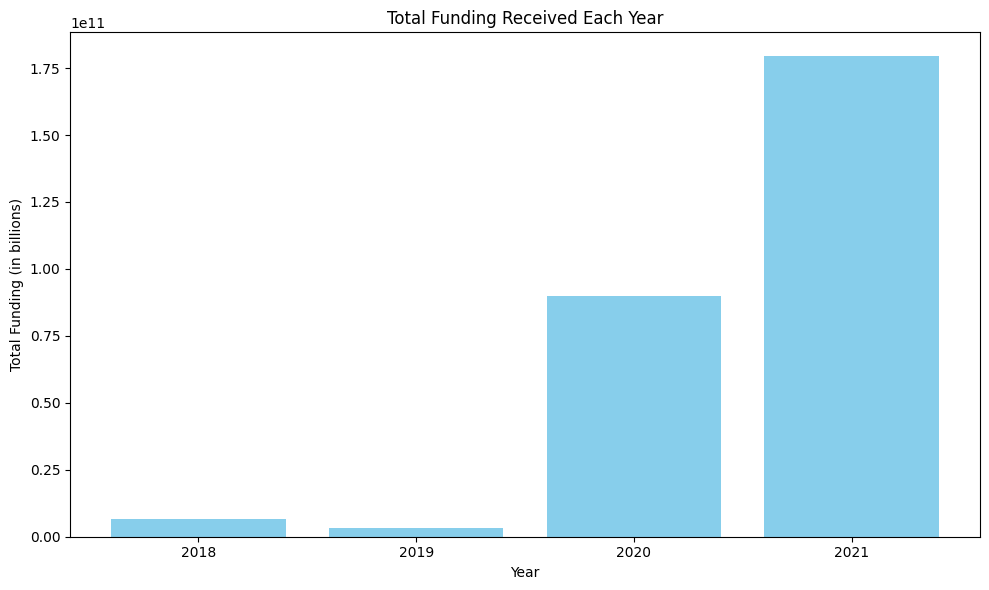

In [241]:
#Plot the visuals 
plt.figure(figsize=(10, 6))
plt.bar(Total_funding_each_year["Funding Year"], Total_funding_each_year["Amount"], color='skyblue')
plt.title('Total Funding Received Each Year')
plt.xlabel('Year')
plt.ylabel('Total Funding (in billions)')
plt.xticks(Total_funding_each_year["Funding Year"])
plt.tight_layout()
plt.show()

##### This indicates the total funding received for each year from 2018 to 2021. It appears that there is a significant increase in funding from 2018 to 2021, even though there was a dip in 2019 with the highest amount received in 2021. Using this data to analyze funding trends over the years shows growth in the dynamics of the funding landscape in the Indian startup ecosystem.

#### Question Two: How many start-ups got funded each year?

In [242]:
#Use the value_counts() function to calculate the number of funding rounds received each year
Number_of_funding_each_year = df["Funding Year"].value_counts()
Number_of_funding_each_year

Funding Year
2021    1180
2020    1051
2018     525
2019      89
Name: count, dtype: int64

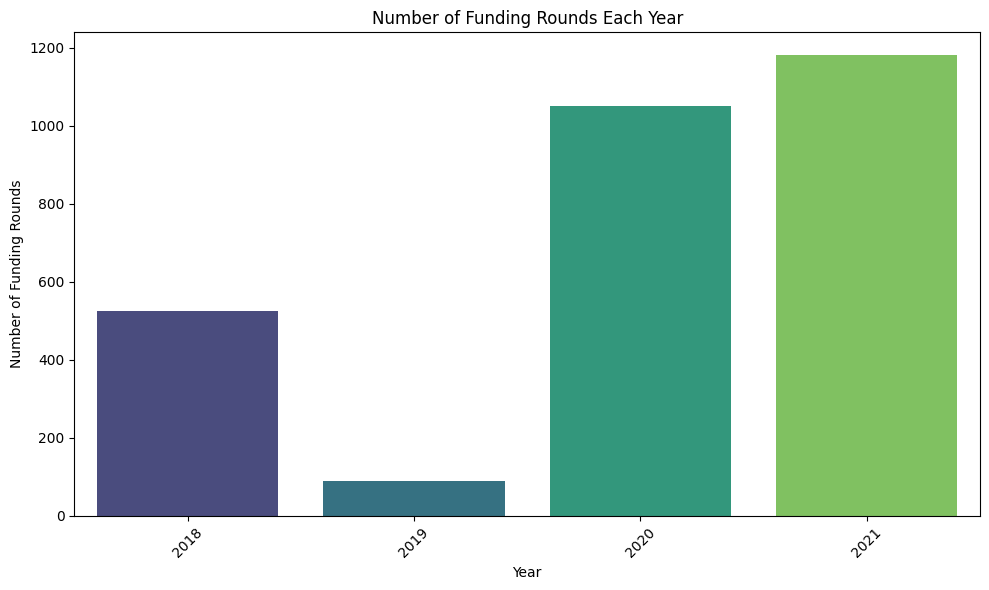

In [243]:
#Plot the number of funding rounds received each year
plt.figure(figsize=(10, 6))
sns.barplot(x=Number_of_funding_each_year.index, y=Number_of_funding_each_year.values, palette="viridis")
plt.title('Number of Funding Rounds Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Funding Rounds')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


##### This output shows the distribution of funding rounds across different years. It appears that there has been a significant increase in the number of funding rounds from 2018 to 2021, with the highest number of funding rounds recorded in 2021. This confirms 2021 as the year with alot of funding amounts establishing the growth in funding activities from 2018.

#### Question Three: Top ten start-ups that received the most funding?

In [244]:
#Check the top 10 most funded startups based on the aggregated funding amounts received
#Group by company/brand and summing the amounts
Funded_Startups = df.groupby("Company_Brand").sum(numeric_only=True).reset_index() 

#Sort from highest to lowest funding amounts
Funded_Startups.sort_values(['Amount'], ascending=False, inplace=True) 

#Select the top 10 most funded startups
Most_Funded_Startups = Funded_Startups.head(10) 
Most_Funded_Startups

,Company_Brand,Amount,Funding Year
69,Alteria Capital,150000000000,2021
1598,Reliance Retail Ventures Ltd,70000000000,2020
1766,Snowflake,3000000000,2020
1595,Reliance,2200000000,2020
1861,Swiggy,1956000000,8079
2047,VerSe Innovation,1450000000,4042
161,BYJU'S,1260000000,8084
507,Dream Sports,1240000000,4042
2201,Zomato,1239000000,14138
279,Byju’S,1040000000,4038


##### There are some inconsistencies in the data where the "Funding Year" column contains values that are not years. To handle this, we can filter out the rows where the "Funding Year" values are not valid years and also rename BYJU'S.

In [245]:
#Rename "Byju’S" to "BYJU'S" and merge the funding amounts
Most_Funded_Startups.loc[Most_Funded_Startups['Company_Brand'] == "BYJU'S", 'Company_Brand'] = "Byju’S"
Most_Funded_Startups = Most_Funded_Startups.groupby('Company_Brand', as_index=False)['Amount'].sum()

In [246]:
#Convert the "Funding Year" column to numeric, coercing errors to NaN
df["Funding Year"] = pd.to_numeric(df["Funding Year"], errors="coerce")

#Filter out rows where "Funding Year" values are not valid years
df = df[df["Funding Year"].notnull()]

#Group the amounts received by startups by the company/brand name
Funded_Startups = df.groupby(["Company_Brand", "Funding Year"])["Amount"].sum().reset_index()

#Sort the startups from highest to lowest funding amounts  
Funded_Startups.sort_values(by="Amount", ascending=False, inplace=True)

#Select the top 10 most funded startups
Most_Funded_Startups = Funded_Startups.head(10)
Most_Funded_Startups

,Company_Brand,Funding Year,Amount
73,Alteria Capital,2021,150000000000
1821,Reliance Retail Ventures Ltd,2020,70000000000
2013,Snowflake,2020,3000000000
1818,Reliance,2020,2200000000
2329,VerSe Innovation,2021,1450000000
174,BYJU'S,2021,1260000000
569,Dream Sports,2021,1240000000
2494,Zomato,2020,1029000000
2120,Swiggy,2018,1000000000
1351,Meesho,2021,870000000


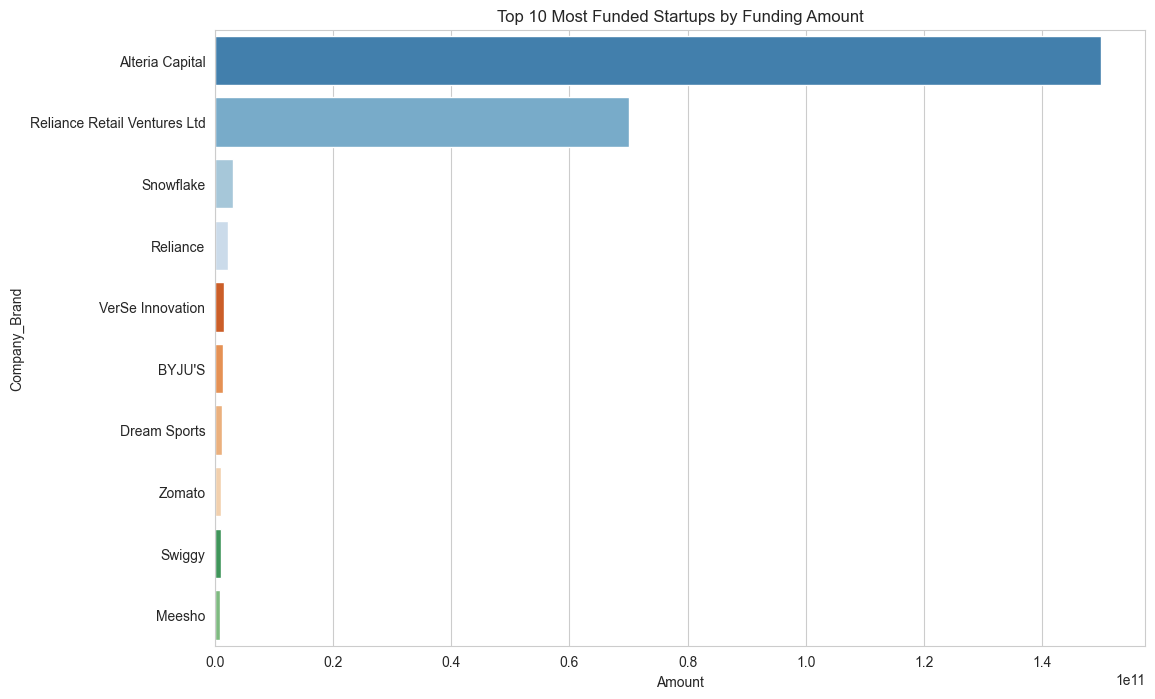

In [247]:
#Plot the visuals
#Set the style
sns.set_style("whitegrid")

#Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=Most_Funded_Startups, y="Company_Brand", x="Amount", palette="tab20c")
plt.xlabel('Amount')
plt.ylabel('Company_Brand')
plt.title('Top 10 Most Funded Startups by Funding Amount')
plt.show()

##### This shows the top 10 most funded startups, along with the funding amount they received and the corresponding funding year. It appears that some startups have received significant amounts of funding, especially Alteria Capital and Reliance Retail Ventures Ltd.

#### Question Four: Which ten start-ups received the least funding?

In [248]:
#Selecting the least amounts greater than 0
Least_Funded_Startups = Funded_Startups[Funded_Startups['Amount']>0].tail(10)
Least_Funded_Startups

,Company_Brand,Funding Year,Amount
1408,Monech,2020,12700
2146,Teach Us,2020,12700
137,Authmetrik,2018,10000
865,Glii,2021,10000
1405,Mombay,2018,7500
88,Antariksh Waste Ventures Pvt Ltd,2018,7300
651,Enlyft Digital Solutions Private Limited,2018,2920
1482,Next Digital Solutions,2018,1460
389,Classworks India,2018,1460
2266,Ultraviolette Automotive,2018,876


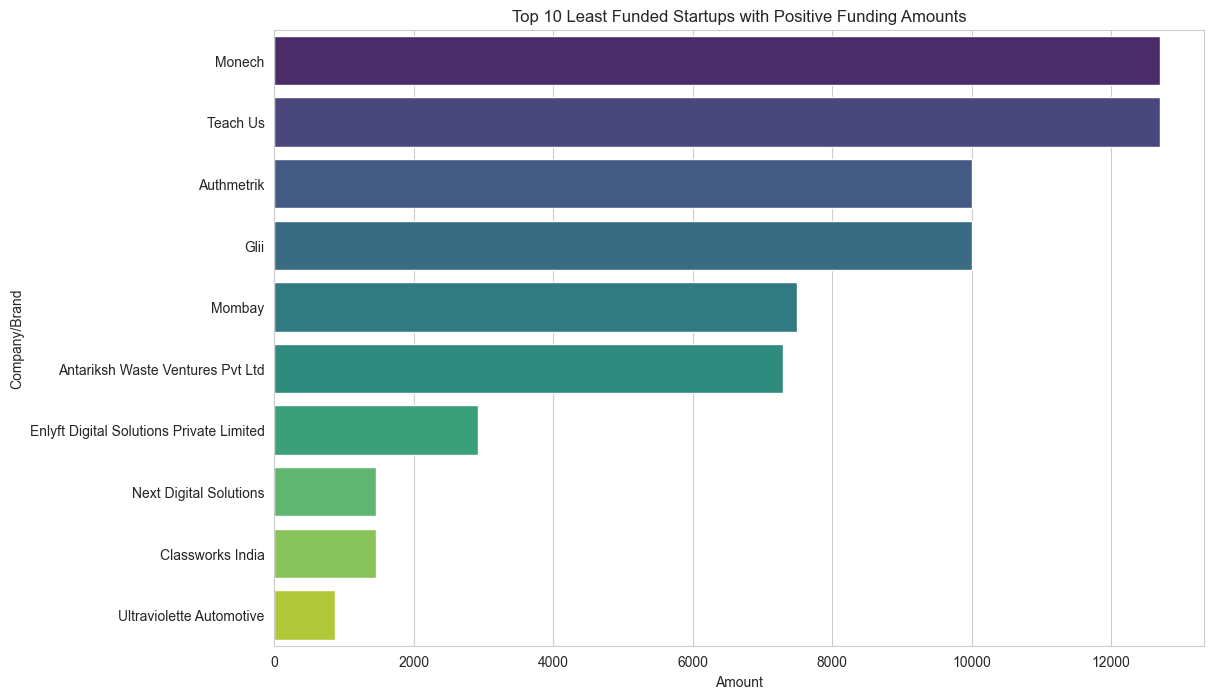

In [249]:
#Set the style
sns.set_style("whitegrid")

#Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=Least_Funded_Startups, x="Amount", y="Company_Brand", palette="viridis")
plt.xlabel('Amount')
plt.ylabel('Company/Brand')
plt.title('Top 10 Least Funded Startups with Positive Funding Amounts')
plt.show()

#### Question Five: Top ten sectors that received the most funding?

In [250]:
#Group the amounts received by startups by the sector
Funded_Sectors = df.groupby("Sector").sum(numeric_only=True).reset_index()

#Sorting from the highest to lowest and applying .head(10)
Funded_Sectors.sort_values(["Amount"], ascending = False, inplace=True)
Most_Funded_Sectors = Funded_Sectors.head(10)

#Drop the "Funding Year" column if it exists
if "Funding Year" in Most_Funded_Sectors.columns:
    Most_Funded_Sectors.drop(columns=["Funding Year"], inplace=True)

#Display the results
print(Most_Funded_Sectors)

                             Sector        Amount
1    Banking and Financial Services  159905410100
7             E-Commerce and Retail   76248501100
17                            Other   10886010874
8                         Education    6246311830
13      Information Technology (IT)    4691842110
0   Agriculture and Food Production    4075460700
12           Healthcare and Fitness    3772520985
15          Media and Entertainment    2827469400
14                    Manufacturing    2791187322
3   Career and Personal Development    2387012500


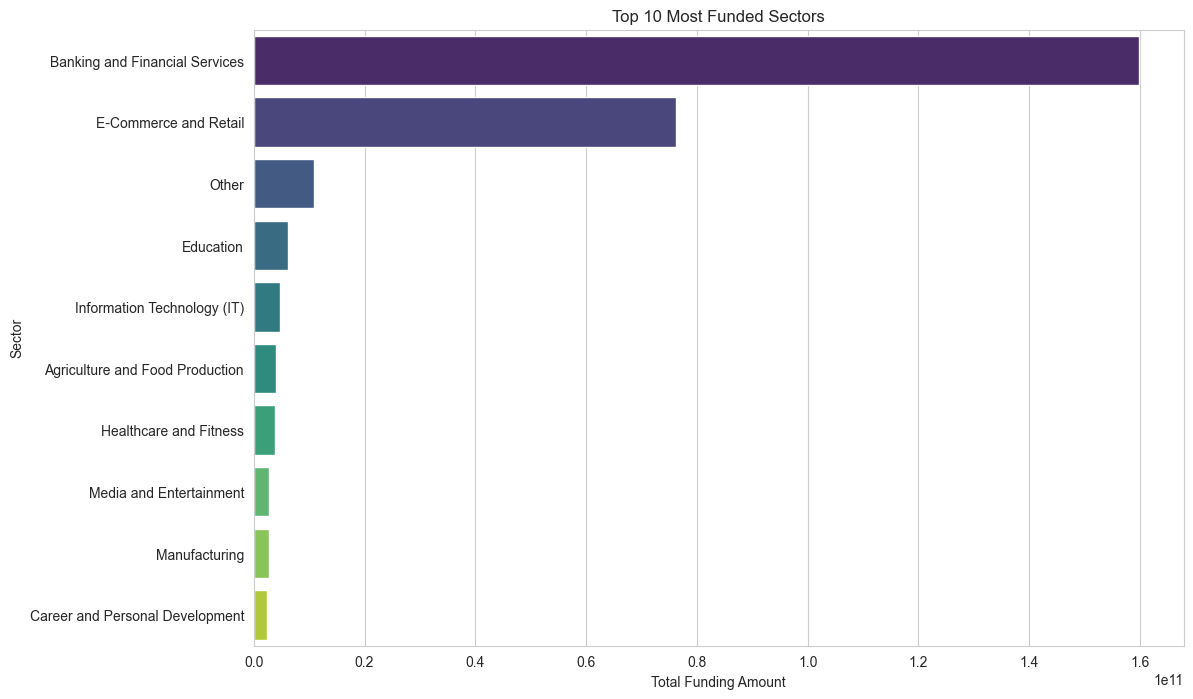

In [251]:
#Set the style
sns.set_style("whitegrid")

#Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=Most_Funded_Sectors, x="Amount", y="Sector", palette="viridis")
plt.xlabel('Total Funding Amount')
plt.ylabel('Sector')
plt.title('Top 10 Most Funded Sectors')
plt.show()

#### Question Six: Which ten sectors received the least funding?

In [252]:
#Selecting the least amounts greater than 0
Least_Funded_Sectors = Funded_Sectors[Funded_Sectors['Amount']>0].tail(10)

#Drop the "Funding Year" column if it exists
if "Funding Year" in Least_Funded_Sectors.columns:
    Least_Funded_Sectors.drop(columns=["Funding Year"], inplace=True)

#Display the results
print(Least_Funded_Sectors)

                                Sector     Amount
11                  Fashion and Beauty  744650200
9                               Energy  493600000
2                           Blockchain  299002000
18                         Real Estate   16355000
19                  Social Development    7097000
16  Multinational Conglomerate Company    5660000
21               Water and Environment    2842360
4                         Construction    1100000
5                    Cultural Heritage    1064000
6                              Defense    1000000


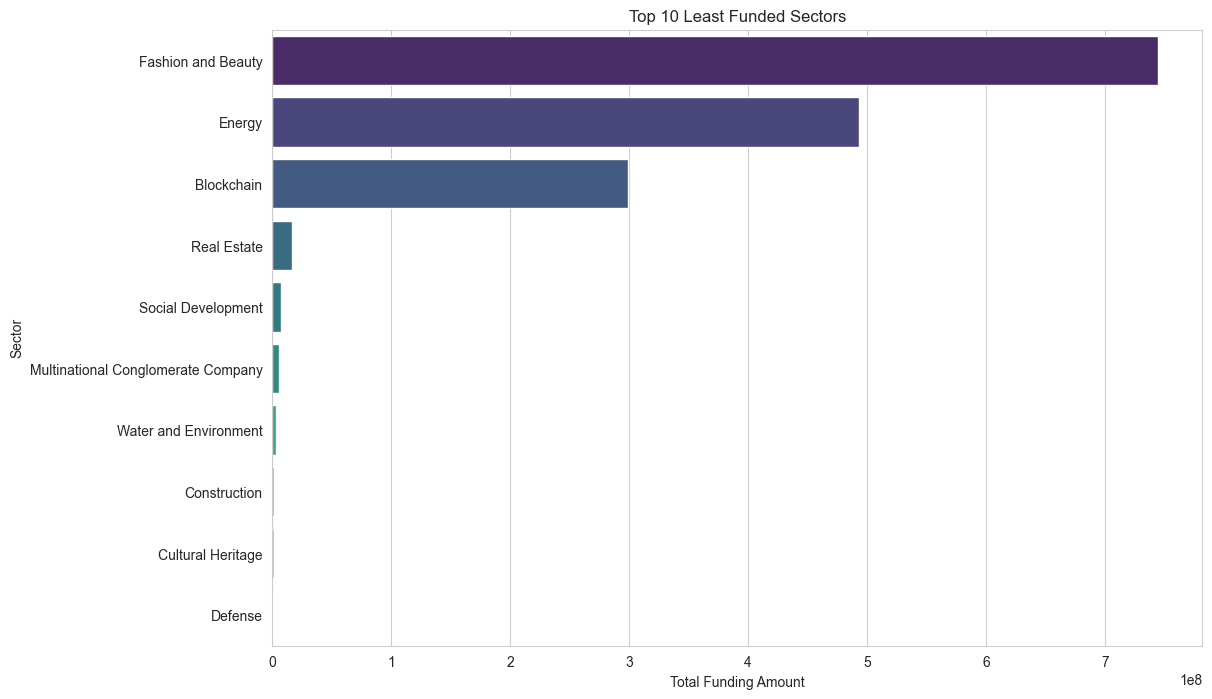

In [253]:
#Set the style
sns.set_style("whitegrid")

#Plotting
plt.figure(figsize=(12, 8))
sns.barplot(data=Least_Funded_Sectors, x="Amount", y="Sector", palette="viridis")
plt.xlabel('Total Funding Amount')
plt.ylabel('Sector')
plt.title('Top 10 Least Funded Sectors')
plt.show()

#### EVALUATION
Since the p-value (0.9997454509325898) is greater than the Significance level (0.05), we fail to reject the null hypothesis. This means that our null hypothesis ('The Sector a start-up belongs to has no significant impact on the funding amount it receives') is correct.

The top five sectors whose start-ups received the highest funding are the Banking and Financial Services Sector, the E-Commerce and Retail Sector, Education Sector, Information Technology (IT) Sector and the Agriculture and Food Production Sector. 

The top five start-ups that received the highest funding are Alteria Capital, Reliance Retail Ventures Ltd, Snowflake, Reliance and VerSe Innovation.

The chart for the ten start-ups that received the most funding and the ten sectors that received the most funding are similar.The two startups that received the highest funding (Alteria Capital and Reliance Retail Ventures Ltd) will be evaluated further in order to gain insight into some factors that can influence high funding.

In [254]:
#Identify the rows that have 'Alteria Capital' in the "Company_Brand" Column using the cleaned dataset
df.loc[df["Company_Brand"] == 'Alteria Capital']

,Company_Brand,HeadQuarter,Sector,Amount,Funding Year
1738,Alteria Capital,Mumbai,Banking and Financial Services,150000000000,2021


##### Alteria Capital is the start-up that received the highest funding amount . It belongs to the Banking and Financial Services sector which is also the sector with the highest funding and is located in Mumbai and it received the funding in 2021.  

In [255]:
#Identify the rows that have 'Reliance Retail Ventures Ltd' in the "Company_Brand" Column using the cleaned dataset
df.loc[df["Company_Brand"] == 'Reliance Retail Ventures Ltd']

,Company_Brand,HeadQuarter,Sector,Amount,Funding Year
892,Reliance Retail Ventures Ltd,Mumbai,E-Commerce and Retail,70000000000,2020


In [256]:
#Identify the rows that have 'Reliance Retail Ventures Ltd' in the "Company_Brand" Column using the original dataset
df_2020N.loc[df_2020N["Company_Brand"] == 'Reliance Retail Ventures Ltd']

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
280,Reliance Retail Ventures Ltd,2006.0,Mumbai,Retail,Reliance Retail offers online shopping and a c...,Mukesh Ambani,"Silver Lake, Mubadala Investment Company",7.000000e+10,None,None


##### Reliance Retail Ventures Ltd is the start-up that received the second highest funding amount . It belongs to the  E-Commerce and Retail sector which is also the sector with the second highest funding, it is located in Mumbai, it received the funding in 2020 and the investors are Silver Lake and Mubadala Investment Company.

#### RECOMMENDATION
Based on the analysis findings, it is advisable for the team to explore Mumbai, located in the state of Maharashtra, as an ideal startup location due to its notable ability to attract substantial funding. Mumbai, renowned as India's financial capital and the most populous city in the country, boasts a sizable market potential owing to its large population. This factor is particularly advantageous for startups, as it signifies ample opportunities for business growth.
Furthermore, the Banking and Financial Services sector, along with the E-Commerce and Retail sector, emerges as the top-performing sectors deserving consideration. In addition, Silver Lake and Mubadala Investment Company stand out as the top-performing investors worth approaching for funding opportunities.